In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import pyarrow as pa
import tarfile
import gzip
import io
from tqdm import tqdm

import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [2]:
# higashi_schema = pa.schema(
#     [
#         ("cell_name", pa.string()),
#         ("cell_id", pa.int32()),
#         ("chrom1", pa.string()),
#         ("pos1", pa.int64()),
#         ("chrom2", pa.string()),
#         ("pos2", pa.int64()),
#         ("count", pa.int32()),
#     ]
# )


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# !chmod +x /content/drive/Shareddrives/MLCB_project_dataset/unzip_tar_v3.sh
# !/content/drive/Shareddrives/MLCB_project_dataset/unzip_tar_v3.sh

In [5]:

# dataset_path = '/content/drive/Shareddrives/MLCB_project_dataset/'
dataset_path = '/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish'
libraries_path = '/n/home09/pren/libraries'
fish_path = os.path.join(dataset_path, 'multiplexed_fish')
hic_path = os.path.join(dataset_path, 'schic_snm3cseq')
hic_ecker_2023_path = os.path.join(hic_path, 'data')

# fish_datasets = ['liu_zhuang_2023_p1', 'liu_zhuang_2023_p2', 'murphy_boetigger_2024', 'takei_cai_2021_science', 'takei_cai_2024']
# hic_datasets = ['liu_ecker_2021', 'liu_ecker_2023']

fish_datasets = ['4DNESMTNNB3N', '4DNESPE924IP']
fish_path1 = os.path.join(fish_path, fish_datasets[0])
fish_path2 = os.path.join(fish_path, fish_datasets[1])


In [7]:
# Load scHi-C df

def process_schic_tsvs(data_dir, out_path='.'):
  # dataframes = []
  filenames = []
  for idx, cur_file in enumerate(os.listdir(data_dir)):
#     cur_file = os.path.join(data_dir, cur_dir, f'{cur_dir}.tsv.gz')
    print('cur_file: ', cur_file)
    cur_file_path = os.path.join(data_dir, cur_file)
    print('cur_file_path: ', cur_file_path)
    filenames.append(cur_file)
    tar = tarfile.open(cur_file_path, 'r')
    for member in tar.getmembers():
        print(member.name)
    cur_file_root = cur_file[:-8]
    print('cur_file_root: ', cur_file_root)
#     tsv_file = tar.extractfile(os.path.join(data_dir, cur_file_root, f'{cur_file_root}.tsv.gz'))
    tsv_file = tar.extractfile(os.path.join(cur_file_root, f'{cur_file_root}.tsv.gz'))
    cur_df = pd.read_csv(
                tsv_file,
                sep="\t",
                header=None,
                names=["ph1a", "chrom1", "pos1", "ph1b", "ph2a", "chrom2", "pos2", "ph2b"],
                compression="gzip",
                low_memory=False,
                )
    tar.close()
    # cur_df["cell_name"] = cur_dir
    cur_df["cell_id"] = cur_file.split('.3C.')[0]
    cur_df["count"] = 1
    # cur_df = cur_df[["cell_name", "cell_id", "chrom1", "pos1", "chrom2", "pos2", "count"]]
    cur_df = cur_df[["cell_id", "chrom1", "pos1", "chrom2", "pos2", "count"]]
    cur_df.to_csv(os.path.join(out_path, os.path.splitext(cur_file)[0] + '_proc.txt'), sep='\t', index=False)

    # dataframes.append(cur_df)
  # return pd.concat(dataframes, ignore_index=True)
  return filenames
schic_filenames = process_schic_tsvs(hic_ecker_2023_path, out_path=os.path.join(hic_path, 'data_proc'))
schic_filenames


cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-G13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-G13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-G13.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-G13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-G13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-G14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-G14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-G14.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-G14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-G14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-H1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-H1.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-H1.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-N13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-N13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-N13.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-N13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-N13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-N14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-N14.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-N14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-1-I7-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-1-I7-N2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-1-I7-N2.3C.contact/CEMBA3C_2A3C_R1_P2-1-I7-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-1-I7-N2.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-D4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-D4.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-D4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-E15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-E15.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-E15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-E16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-E16.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-E16.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-K16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-K16.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-K16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-K3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-K3.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-K3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-2-I7-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-2-I7-K4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-2-I7-K4.3C.contact/CEMBA3C_2A3C_R1_P2-2-I7-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-2-I7-K4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-A6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-A6.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-A6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-B17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-B17.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-B17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-B18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-B18.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-B18.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-H17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-H17.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-H17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-H18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-H18.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-H18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-H5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-H5.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-H5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-N18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-N18.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-N18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-N5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-N5.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-N5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-3-I7-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-3-I7-N6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-3-I7-N6.3C.contact/CEMBA3C_2A3C_R1_P2-3-I7-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-3-I7-N6.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-D8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-D8.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-D8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-E19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-E19.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-E19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-E20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-E20.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-E20.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-K19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-K19.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-K19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-K20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-K20.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-K20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-4-I7-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-4-I7-K7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-4-I7-K7.3C.contact/CEMBA3C_2A3C_R1_P2-4-I7-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-4-I7-K7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-A22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-A22.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-A22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-A9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-A9.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-A9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-B10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-B10.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-B10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-H10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-H10.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-H10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-H21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-H21.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-H21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-H22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-H22.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-H22.3C.con

cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-N21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-N21.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-N21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-N22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-N22.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-N22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-5-I7-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-5-I7-N9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-5-I7-N9.3C.contact/CEMBA3C_2A3C_R1_P2-5-I7-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-5-I7-N9.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-D24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-D24.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-D24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-E11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-E11.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-E11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-E12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-E12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-E12.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-E12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-E12.3C.con

cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-K11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-K11.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-K11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-K12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-K12.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-K12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P2-6-I7-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P2-6-I7-K23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P2-6-I7-K23.3C.contact/CEMBA3C_2A3C_R1_P2-6-I7-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P2-6-I7-K23.3C.con

cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-A14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-A14.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-A14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-A2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-A2.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-A2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-B13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-B13.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-B13.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-H13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-H13.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-H13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-H14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-H14.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-H14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-H2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-H2.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-H2.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-N14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-N14.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-N14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-N2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-N2.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-N2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-1-M7-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-1-M7-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-1-M7-O1.3C.contact/CEMBA3C_2A3C_R1_P3-1-M7-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-1-M7-O1.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-D4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-D4.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-D4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-E15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-E15.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-E15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-E16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-E16.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-E16.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-K16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-K16.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-K16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-K3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-K3.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-K3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-2-M7-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-2-M7-K4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-2-M7-K4.3C.contact/CEMBA3C_2A3C_R1_P3-2-M7-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-2-M7-K4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-A6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-A6.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-A6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-B17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-B17.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-B17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-B18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-B18.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-B18.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-H17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-H17.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-H17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-H18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-H18.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-H18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-H5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-H5.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-H5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-N5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-N5.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-N5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-N6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-N6.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-N6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-3-M7-O17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-3-M7-O17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-3-M7-O17.3C.contact/CEMBA3C_2A3C_R1_P3-3-M7-O17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-3-M7-O17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-D8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-D8.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-D8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-E19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-E19.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-E19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-E20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-E20.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-E20.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-K19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-K19.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-K19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-K20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-K20.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-K20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-4-M7-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-4-M7-K7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-4-M7-K7.3C.contact/CEMBA3C_2A3C_R1_P3-4-M7-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-4-M7-K7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-A21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-A21.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-A21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-A22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-A22.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-A22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-A9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-A9.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-A9.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-G22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-G22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-G22.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-G22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-G22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-G9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-G9.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-G9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-H10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-H10.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-H10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-N10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-N10.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-N10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-N21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-N21.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-N21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-5-M7-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-5-M7-N22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-5-M7-N22.3C.contact/CEMBA3C_2A3C_R1_P3-5-M7-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-5-M7-N22.3C.con

cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-E12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-E12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-E12.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-E12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-E12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-E23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-E23.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-E23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-E24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-E24.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-E24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-K23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-K23.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-K23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-K24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-K24.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-K24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P3-6-M7-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P3-6-M7-L11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P3-6-M7-L11.3C.contact/CEMBA3C_2A3C_R1_P3-6-M7-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P3-6-M7-L11.3C.con

cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-B1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-B1.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-B1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-B13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-B13.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-B13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-B14.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-B14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-H2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-H2.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-H2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-I1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-I1.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-I1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-I13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-I13.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-I13.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-O1.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-O1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-O13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-O13.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-O13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-1-O7-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-1-O7-O14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-1-O7-O14.3C.contact/CEMBA3C_2A3C_R1_P4-1-O7-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-1-O7-O14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-E3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-E3.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-E3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-E4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-E4.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-E4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-F15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-F15.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-F15.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-L16.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-L16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-L3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-L3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-L3.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-L3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-L3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-2-O7-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-2-O7-L4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-2-O7-L4.3C.contact/CEMBA3C_2A3C_R1_P4-2-O7-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-2-O7-L4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-C17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-C17.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-C17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-C18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-C18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-C18.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-C18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-C18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-C5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-C5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-C5.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-C5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-C5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-I5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-I5.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-I5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-I6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-I6.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-I6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-J17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-J17.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-J17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-P17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-P17.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-P17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-P18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-P18.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-P18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-3-O7-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-3-O7-P5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-3-O7-P5.3C.contact/CEMBA3C_2A3C_R1_P4-3-O7-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-3-O7-P5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-F7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-F7.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-F7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-F8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-F8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-F8.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-F8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-F8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-G19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-G19.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-G19.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-L8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-L8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-L8.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-L8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-L8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-M19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-M19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-M19.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-M19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-M19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-4-O7-M20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-4-O7-M20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-4-O7-M20.3C.contact/CEMBA3C_2A3C_R1_P4-4-O7-M20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-4-O7-M20.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-C21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-C21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-C21.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-C21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-C21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-C22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-C22.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-C22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-C9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-C9.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-C9.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-I9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-I9.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-I9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-J10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-J10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-J10.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-J10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-J10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-J21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-J21.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-J21.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-P21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-P21.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-P21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-P22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-P22.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-P22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-5-O7-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-5-O7-P9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-5-O7-P9.3C.contact/CEMBA3C_2A3C_R1_P4-5-O7-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-5-O7-P9.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-G12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-G12.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-G12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-G23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-G23.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-G23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-G24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-G24.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-G24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-M24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-M24.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-M24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-N11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-N11.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-N11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P4-6-O7-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P4-6-O7-N12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P4-6-O7-N12.3C.contact/CEMBA3C_2A3C_R1_P4-6-O7-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P4-6-O7-N12.3C.con

cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-D2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-D2.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-D2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-E1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-E1.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-E1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-E13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-E13.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-E13.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-K2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-K2.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-K2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-L1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-L1.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-L1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-1-A9-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-1-A9-L13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-1-A9-L13.3C.contact/CEMBA3C_2A3C_R1_P5-1-A9-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-1-A9-L13.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-B3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-B3.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-B3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-B4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-B4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-B4.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-B4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-B4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-C15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-C15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-C15.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-C15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-C15.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-I16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-I16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-I16.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-I16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-I16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-I3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-I3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-I3.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-I3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-I3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-I4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-I4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-I4.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-I4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-I4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-O4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-O4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-O4.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-O4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-O4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-P15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-P15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-P15.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-P15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-P15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-2-A9-P16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-2-A9-P16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-2-A9-P16.3C.contact/CEMBA3C_2A3C_R1_P5-2-A9-P16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-2-A9-P16.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-G17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-G17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-G17.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-G17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-G17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-G18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-G18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-G18.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-G18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-G18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-G6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-G6.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-G6.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-M6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-M6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-M6.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-M6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-M6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-N17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-N17.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-N17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-3-A9-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-3-A9-N18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-3-A9-N18.3C.contact/CEMBA3C_2A3C_R1_P5-3-A9-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-3-A9-N18.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-D19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-D19.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-D19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-D20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-D20.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-D20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-D7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-D7.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-D7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-J20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-J20.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-J20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-J7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-J7.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-J7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-4-A9-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-4-A9-K19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-4-A9-K19.3C.contact/CEMBA3C_2A3C_R1_P5-4-A9-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-4-A9-K19.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-A10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-A10.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-A10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-A21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-A21.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-A21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-A22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-A22.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-A22.3C.con

cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-G22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-G22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-G22.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-G22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-G22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-G9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-G9.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-G9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-H10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-H10.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-H10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-M9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-M9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-M9.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-M9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-M9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-N10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-N10.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-N10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-5-A9-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-5-A9-N21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-5-A9-N21.3C.contact/CEMBA3C_2A3C_R1_P5-5-A9-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-5-A9-N21.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-D12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-D12.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-D12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-D23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-D23.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-D23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-D24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-D24.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-D24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-J24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-J24.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-J24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-K11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-K11.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-K11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P5-6-A9-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P5-6-A9-K12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P5-6-A9-K12.3C.contact/CEMBA3C_2A3C_R1_P5-6-A9-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P5-6-A9-K12.3C.con

cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-A1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-A1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-A1.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-A1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-A1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-A13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-A13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-A13.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-A13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-A13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-A14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-A14.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-A14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-H1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-H1.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-H1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-H13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-H13.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-H13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-H14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-H14.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-H14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-O1.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-O1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-O13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-O13.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-O13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-1-C9-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-1-C9-O14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-1-C9-O14.3C.contact/CEMBA3C_2A3C_R1_P6-1-C9-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-1-C9-O14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-E3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-E3.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-E3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-E4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-E4.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-E4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-F15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-F15.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-F15.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-L16.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-L16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-L3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-L3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-L3.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-L3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-L3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-2-C9-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-2-C9-L4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-2-C9-L4.3C.contact/CEMBA3C_2A3C_R1_P6-2-C9-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-2-C9-L4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-B5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-B5.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-B5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-B6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-B6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-B6.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-B6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-B6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-C17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-C17.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-C17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-I17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-I17.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-I17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-I18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-I18.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-I18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-I5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-I5.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-I5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-O18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-O18.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-O18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-O5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-O5.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-O5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-3-C9-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-3-C9-O6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-3-C9-O6.3C.contact/CEMBA3C_2A3C_R1_P6-3-C9-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-3-C9-O6.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-E8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-E8.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-E8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-F19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-F19.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-F19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-F20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-F20.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-F20.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-L19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-L19.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-L19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-L20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-L20.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-L20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-4-C9-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-4-C9-L7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-4-C9-L7.3C.contact/CEMBA3C_2A3C_R1_P6-4-C9-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-4-C9-L7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-B22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-B22.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-B22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-B9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-B9.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-B9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-C10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-C10.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-C10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-I10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-I10.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-I10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-I21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-I21.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-I21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-I22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-I22.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-I22.3C.con

cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-O21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-O21.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-O21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-O22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-O22.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-O22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-5-C9-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-5-C9-O9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-5-C9-O9.3C.contact/CEMBA3C_2A3C_R1_P6-5-C9-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-5-C9-O9.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-E24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-E24.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-E24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-F11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-F11.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-F11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-F12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-F12.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-F12.3C.con

cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-L11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-L11.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-L11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-L12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-L12.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-L12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P6-6-C9-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P6-6-C9-L23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P6-6-C9-L23.3C.contact/CEMBA3C_2A3C_R1_P6-6-C9-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P6-6-C9-L23.3C.con

cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-B14.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-B14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-B2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-B2.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-B2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-C1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-C1.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-C1.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-I1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-I1.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-I1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-I13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-I13.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-I13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-I14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-I14.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-I14.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-O14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-O14.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-O14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-O2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-O2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-O2.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-O2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-O2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-1-E9-P1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-1-E9-P1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-1-E9-P1.3C.contact/CEMBA3C_2A3C_R1_P7-1-E9-P1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-1-E9-P1.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-F15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-F15.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-F15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-F16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-F16.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-F16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-F3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-F3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-F3.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-F3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-F3.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-L16.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-L16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-L3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-L3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-L3.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-L3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-L3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-2-E9-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-2-E9-L4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-2-E9-L4.3C.contact/CEMBA3C_2A3C_R1_P7-2-E9-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-2-E9-L4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-C17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-C17.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-C17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-C18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-C18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-C18.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-C18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-C18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-C5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-C5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-C5.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-C5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-C5.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-I5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-I5.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-I5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-I6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-I6.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-I6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-J17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-J17.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-J17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-O6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-O6.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-O6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-P17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-P17.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-P17.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-3-E9-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-3-E9-P18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-3-E9-P18.3C.contact/CEMBA3C_2A3C_R1_P7-3-E9-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-3-E9-P18.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-F19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-F19.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-F19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-F20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-F20.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-F20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-F7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-F7.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-F7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-L20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-L20.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-L20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-L7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-L7.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-L7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-4-E9-L8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-4-E9-L8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-4-E9-L8.3C.contact/CEMBA3C_2A3C_R1_P7-4-E9-L8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-4-E9-L8.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-B9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-B9.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-B9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-C10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-C10.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-C10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-C21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-C21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-C21.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-C21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-C21.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-I10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-I10.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-I10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-I21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-I21.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-I21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-I22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-I22.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-I22.3C.con

cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-O22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-O22.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-O22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-O9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-O9.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-O9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-5-E9-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-5-E9-P10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-5-E9-P10.3C.contact/CEMBA3C_2A3C_R1_P7-5-E9-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-5-E9-P10.3C.contact


CEMBA3C_2A3C_R1_P7-6-E9-E24.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-E24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-F11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-6-E9-F11.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-F11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-F12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-6-E9-F12.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-F12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-F23.3C.contact.tsv

cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-L12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-6-E9-L12.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-L12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-L23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-6-E9-L23.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-L23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P7-6-E9-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P7-6-E9-L24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P7-6-E9-L24.3C.contact/CEMBA3C_2A3C_R1_P7-6-E9-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P7-6-E9-L24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-C13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-C13.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-C13.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-D1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-D1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-D1.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-D1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-D1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-D13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-D13.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-D13.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-J2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-J2.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-J2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-K1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-K1.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-K1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-1-G9-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-1-G9-K13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-1-G9-K13.3C.contact/CEMBA3C_2A3C_R1_P8-1-G9-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-1-G9-K13.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-A3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-A3.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-A3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-A4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-A4.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-A4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-B15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-B15.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-B15.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-G4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-G4.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-G4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-H15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-H15.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-H15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-H16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-H16.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-H16.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-N15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-N15.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-N15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-N16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-N16.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-N16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-2-G9-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-2-G9-N3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-2-G9-N3.3C.contact/CEMBA3C_2A3C_R1_P8-2-G9-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-2-G9-N3.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-D18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-D18.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-D18.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-D5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-D5.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-D5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-D6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-D6.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-D6.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-J5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-J5.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-J5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-J6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-J6.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-J6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-3-G9-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-3-G9-K17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-3-G9-K17.3C.contact/CEMBA3C_2A3C_R1_P8-3-G9-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-3-G9-K17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-A20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-A20.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-A20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-A7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-A7.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-A7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-A8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-A8.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-A8.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-G8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-G8.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-G8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-H19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-H19.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-H19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-H20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-H20.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-H20.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-N19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-N19.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-N19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-N20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-N20.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-N20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-4-G9-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-4-G9-N7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-4-G9-N7.3C.contact/CEMBA3C_2A3C_R1_P8-4-G9-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-4-G9-N7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-D22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-D22.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-D22.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-D22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-D22.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-D9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-D9.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-D9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-E10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-E10.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-E10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-K21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-K21.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-K21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-K9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-K9.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-K9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-5-G9-L10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-5-G9-L10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-5-G9-L10.3C.contact/CEMBA3C_2A3C_R1_P8-5-G9-L10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-5-G9-L10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-A24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-A24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-A24.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-A24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-A24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-B11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-B11.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-B11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-B12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-B12.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-B12.3C.con

cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-H12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-H12.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-H12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-H23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-H23.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-H23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-H24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-H24.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-H24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-O12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-O12.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-O12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-O23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-O23.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-O23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P8-6-G9-O24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P8-6-G9-O24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P8-6-G9-O24.3C.contact/CEMBA3C_2A3C_R1_P8-6-G9-O24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P8-6-G9-O24.3C.con

cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-E2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-E2.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-E2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-F1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-F1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-F1.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-F1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-F1.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-F13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-F13.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-F13.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-F13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-F13.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-L14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-L14.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-L14.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-L14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-L14.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-L2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-L2.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-L2.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-L2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-L2.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-1-I9-M1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-1-I9-M1.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-1-I9-M1.3C.contact/CEMBA3C_2A3C_R1_P9-1-I9-M1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-1-I9-M1.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-B4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-B4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-B4.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-B4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-B4.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-C15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-C15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-C15.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-C15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-C15.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-C16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-C16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-C16.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-C16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-C16.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-I16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-I16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-I16.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-I16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-I16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-I3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-I3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-I3.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-I3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-I3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-J15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-J15.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-J15.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-J15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-J15.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-P16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-P16.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-P16.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-P16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-P16.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-P3.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-P3.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-P3.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-2-I9-P4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-2-I9-P4.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-2-I9-P4.3C.contact/CEMBA3C_2A3C_R1_P9-2-I9-P4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-2-I9-P4.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-F5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-F5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-F5.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-F5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-F5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-F6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-F6.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-F6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-G18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-G18.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-G18.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-G18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-G18.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-M5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-M5.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-M5.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-M5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-M5.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-M6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-M6.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-M6.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-M6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-M6.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-3-I9-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-3-I9-N17.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-3-I9-N17.3C.contact/CEMBA3C_2A3C_R1_P9-3-I9-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-3-I9-N17.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-D19.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-D19.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-D19.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-D20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-D20.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-D20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-D7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-D7.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-D7.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-J20.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-J20.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-J20.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-J7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-J7.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-J7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-J8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-J8.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-J8.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-P7.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-P7.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-P7.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-4-I9-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-4-I9-P8.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-4-I9-P8.3C.contact/CEMBA3C_2A3C_R1_P9-4-I9-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-4-I9-P8.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-A10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-A10.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-A10.3C.contact
cur_f

cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-F9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-F9.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-F9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-G10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-G10.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-G10.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-G21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-G21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-G21.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-G21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-G21.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-M21.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-M21.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-M21.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-M9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-M9.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-M9.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-M9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-M9.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-5-I9-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-5-I9-N10.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-5-I9-N10.3C.contact/CEMBA3C_2A3C_R1_P9-5-I9-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-5-I9-N10.3C.contact


cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-D23.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-D23.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-D23.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-D24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-D24.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-D24.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-E11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-E11.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-E11.3C.con

cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-K11.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-K11.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-K11.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-K12.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-K12.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-K12.3C.contact
cur_file:  CEMBA3C_2A3C_R1_P9-6-I9-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R1_P9-6-I9-K24.3C.contact.tsv.tar
CEMBA3C_2A3C_R1_P9-6-I9-K24.3C.contact/CEMBA3C_2A3C_R1_P9-6-I9-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R1_P9-6-I9-K24.3C.con

cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-B1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-B1.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-B1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-B13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-B13.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-B13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-B14.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-

cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-H14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-H14.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-H14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-H2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-H2.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-H2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-I1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-I1.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-I1.3

cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-N2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-N2.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-N2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-O1.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-O1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-1-A17-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-1-A17-O13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-1-A17-O13.3C.contact/CEMBA3C_2A3C_R2_P1-1-A17-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-1-A17-O13.3

cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-E15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-E15.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17-E15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-E16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-E16.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17-E16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-E3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-E3.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17

cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-K4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-K4.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17-K4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-L15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-L15.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17-L15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-2-A17-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-2-A17-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-2-A17-L16.3C.contact/CEMBA3C_2A3C_R2_P1-2-A17-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-2-A17-

cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-B5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-B5.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-B5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-B6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-B6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-B6.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-B6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-B6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-C17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-C17.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-C17.3

cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-H6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-H6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-H6.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-H6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-H6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-I17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-I17.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-I17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-I18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-I18.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-

cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-O18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-O18.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-O18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-O5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-O5.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-O5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-3-A17-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-3-A17-O6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-3-A17-O6.3C.contact/CEMBA3C_2A3C_R2_P1-3-A17-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-3-A17-O6.3

cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-E7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-E7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-E7.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-E7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17-E7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-F19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-F19.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17-F19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-F20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-F20.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17-

cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-L19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-L19.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17-L19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-L20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-L20.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17-L20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-4-A17-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-4-A17-L7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-4-A17-L7.3C.contact/CEMBA3C_2A3C_R2_P1-4-A17-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-4-A17

cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-B22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-B22.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-B22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-B9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-B9.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-B9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-C10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-C10.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-

cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-I10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-I10.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-I10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-I21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-I21.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-I21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-I22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-I22.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5

cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-O21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-O21.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-O21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-O22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-O22.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17-O22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-5-A17-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-5-A17-O9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-5-A17-O9.3C.contact/CEMBA3C_2A3C_R2_P1-5-A17-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-5-A17

cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-E23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-E23.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6-A17-E23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-E24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-E24.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6-A17-E24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-F11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-F11.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6

cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-L11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-L11.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6-A17-L11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-L12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-L12.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6-A17-L12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P1-6-A17-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P1-6-A17-L23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P1-6-A17-L23.3C.contact/CEMBA3C_2A3C_R2_P1-6-A17-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P1-6

cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-B14.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-B14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-B2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-B2.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-B2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-C1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-C1.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-C1.3

cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-I13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-I13.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-I13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-I14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-I14.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-I14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-I2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-I2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-I2.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-I2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17

cur_file:  CEMBA3C_2A3C_R2_P2-1-C17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-1-C17-P2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-1-C17-P2.3C.contact/CEMBA3C_2A3C_R2_P2-1-C17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-1-C17-P2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-A15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-A15.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-A15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-A16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-A16.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-

cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-G3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-G3.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-G3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-G4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-G4.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-G4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-H15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-H15.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-H15.3

cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-N16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-N16.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-N16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-N3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-N3.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-N3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-2-C17-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-2-C17-N4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-2-C17-N4.3C.contact/CEMBA3C_2A3C_R2_P2-2-C17-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-2-C17-N4.3

cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-D6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-D6.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17-D6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-E17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-E17.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17-E17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-E18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-E18.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17-

cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-K17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-K17.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17-K17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-K18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-K18.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17-K18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-3-C17-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-3-C17-K5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-3-C17-K5.3C.contact/CEMBA3C_2A3C_R2_P2-3-C17-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-3-C17

cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-A8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-A8.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-A8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-B19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-B19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-B19.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-B19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-B19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-B20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-B20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-B20.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-B20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-

cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-H20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-H20.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-H20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-H7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-H7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-H7.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-H7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-H7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-H8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-H8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-H8.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-H8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-H8.3

cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-N7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-N7.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-N7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-N8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-N8.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-N8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-4-C17-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-4-C17-O19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-4-C17-O19.3C.contact/CEMBA3C_2A3C_R2_P2-4-C17-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-4-C17-O19.3

cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-E10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-5-C17-E10.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5-C17-E10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-E21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-5-C17-E21.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5-C17-E21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-E22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-5-C17-E22.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5

CEMBA3C_2A3C_R2_P2-5-C17-K10.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-K10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5-C17-K10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-K21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-5-C17-K21.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5-C17-K21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-K22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-5-C17-K22.3C.contact/CEMBA3C_2A3C_R2_P2-5-C17-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-5-C17-K22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-5-C17-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-5-C17-K9.3

cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-B11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-B11.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-B11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-B12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-B12.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-B12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-B24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-B24.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6

cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-H24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-H24.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-H24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-I11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-I11.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-I11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-I12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-I12.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6

cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-O24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-O24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-O24.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-O24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-O24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-P11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-P11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-P11.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-P11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6-C17-P11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P2-6-C17-P12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P2-6-C17-P12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P2-6-C17-P12.3C.contact/CEMBA3C_2A3C_R2_P2-6-C17-P12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P2-6

cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-F13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-F13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-F13.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-F13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17-F13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-F14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-F14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-F14.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-F14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17-F14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-F2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-F2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-F2.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-F2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17

cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-L2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-L2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-L2.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-L2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17-L2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-M1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-M1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-M1.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-M1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17-M1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-1-E17-M13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-1-E17-M13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-1-E17-M13.3C.contact/CEMBA3C_2A3C_R2_P3-1-E17-M13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-1-E17-M13.3

cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-C3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-C3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-C3.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-C3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-C3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-C4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-C4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-C4.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-C4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-C4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-D15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-D15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-D15.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-D15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-D15.3

cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-J16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-J16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-J16.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-J16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-J16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-J3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-J3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-J3.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-J3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-J3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-J4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-J4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-J4.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-J4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-J4.3

cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-P3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-P3.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-P3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-2-E17-P4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-2-E17-P4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-2-E17-P4.3C.contact/CEMBA3C_2A3C_R2_P3-2-E17-P4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-2-E17-P4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-A17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-A17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-A17.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-A17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-A17.3

cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-F6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-F6.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-F6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-G17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-G17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-G17.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-G17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-G17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-G18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-G18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-G18.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-G18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-

cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-M18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-M18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-M18.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-M18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-M18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-M5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-M5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-M5.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-M5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-M5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-3-E17-M6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-3-E17-M6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-3-E17-M6.3C.contact/CEMBA3C_2A3C_R2_P3-3-E17-M6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-3-E17-M6.3

cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-C7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-C7.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-C7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-C8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-C8.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-C8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-D19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-D19.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-D19.3

cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-I8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-I8.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-I8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-J19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-J19.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-J19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-J20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-J20.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-

cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-P7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-P7.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-P7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-4-E17-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-4-E17-P8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-4-E17-P8.3C.contact/CEMBA3C_2A3C_R2_P3-4-E17-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-4-E17-P8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-A10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-A10.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-A10.3

cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-F9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-F9.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-F9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-G10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-G10.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-G10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-G21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-G21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-G21.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-G21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-

cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-N21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-N21.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-N21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-N22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-N22.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17-N22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-5-E17-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-5-E17-N9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-5-E17-N9.3C.contact/CEMBA3C_2A3C_R2_P3-5-E17-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-5-E17

cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-D23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-D23.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6-E17-D23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-D24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-D24.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6-E17-D24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-E11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-E11.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6

cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-K12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-K12.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6-E17-K12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-K23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-K23.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6-E17-K23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P3-6-E17-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P3-6-E17-K24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P3-6-E17-K24.3C.contact/CEMBA3C_2A3C_R2_P3-6-E17-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P3-6

cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-B1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-B1.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-B1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-B13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-B13.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-B13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-B14.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-

cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-I13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-I13.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-I13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-I14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-I14.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-I14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-I2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-I2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-I2.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-I2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17

CEMBA3C_2A3C_R2_P4-1-G17-P13.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-P13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-P13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-P14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-P14.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-P14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-1-G17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-1-G17-P2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-1-G17-P2.3C.contact/CEMBA3C_2A3C_R2_P4-1-G17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-1-G17-P2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-A15.3C.c

cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-G15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-G15.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17-G15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-G16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-G16.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17-G16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-G3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-G3.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17

cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-N15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-N15.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17-N15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-N16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-N16.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17-N16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-2-G17-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-2-G17-N3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-2-G17-N3.3C.contact/CEMBA3C_2A3C_R2_P4-2-G17-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-2-G17

cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-D18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-3-G17-D18.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-D18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-D5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-3-G17-D5.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-D5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-D6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-3-G17-D6.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-D6.3

CEMBA3C_2A3C_R2_P4-3-G17-J6.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-J6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-K17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-3-G17-K17.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-K17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-K18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-3-G17-K18.3C.contact/CEMBA3C_2A3C_R2_P4-3-G17-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-3-G17-K18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-3-G17-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-3-G17-K5.3C.c

cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-A20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-A20.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-A20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-A7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-A7.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-A7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-A8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-A8.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-A8.3

cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-H19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-H19.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-H19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-H20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-H20.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-H20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-H7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-H7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-H7.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-H7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17

cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-N7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-N7.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-N7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-N8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-N8.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-N8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-4-G17-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-4-G17-O19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-4-G17-O19.3C.contact/CEMBA3C_2A3C_R2_P4-4-G17-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-4-G17-O19.3

cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-E22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-E22.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17-E22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-E9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-E9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-E9.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-E9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17-E9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-F10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-F10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-F10.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-F10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17-

cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-L21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-L21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-L21.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-L21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17-L21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-L22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-L22.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17-L22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-5-G17-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-5-G17-L9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-5-G17-L9.3C.contact/CEMBA3C_2A3C_R2_P4-5-G17-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-5-G17

cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-C12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-C12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-C12.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-C12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6-G17-C12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-C23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-C23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-C23.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-C23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6-G17-C23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-C24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-C24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-C24.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-C24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6

cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-J23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-J23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-J23.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-J23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6-G17-J23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-J24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-J24.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6-G17-J24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P4-6-G17-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P4-6-G17-K11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P4-6-G17-K11.3C.contact/CEMBA3C_2A3C_R2_P4-6-G17-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P4-6

cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-B1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-B1.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-B1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-B13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-B13.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-B13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-B14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-B14.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-H14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-H14.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-H14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-H2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-H2.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-H2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-I1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-I1.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-I1.3

cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-N2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-N2.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-N2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-O1.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-O1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-1-I17-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-1-I17-O13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-1-I17-O13.3C.contact/CEMBA3C_2A3C_R2_P5-1-I17-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-1-I17-O13.3

cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-E16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-E16.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-E16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-E3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-E3.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-E3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-E4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-E4.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-E4.3

cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-K4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-K4.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-K4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-L15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-L15.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-L15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-2-I17-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-2-I17-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-2-I17-L16.3C.contact/CEMBA3C_2A3C_R2_P5-2-I17-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-2-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-B5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-B5.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-B5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-B6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-B6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-B6.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-B6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-B6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-C17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-C17.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-C17.3

cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-I17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-I17.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-I17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-I18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-I18.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-I18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-I5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-I5.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17

cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-O18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-O18.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-O18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-O5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-O5.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-O5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-3-I17-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-3-I17-O6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-3-I17-O6.3C.contact/CEMBA3C_2A3C_R2_P5-3-I17-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-3-I17-O6.3

cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-E8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-E8.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17-E8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-F19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-F19.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17-F19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-F20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-F20.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-L19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-L19.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17-L19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-L20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-L20.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17-L20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-4-I17-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-4-I17-L7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-4-I17-L7.3C.contact/CEMBA3C_2A3C_R2_P5-4-I17-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-4-I17

cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-B22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-B22.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-B22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-B9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-B9.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-B9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-C10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-C10.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-H9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-H9.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-H9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-I10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-I10.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-I10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-I21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-I21.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-O9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-O9.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-O9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-P10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-P10.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-P10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-5-I17-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-5-I17-P21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-5-I17-P21.3C.contact/CEMBA3C_2A3C_R2_P5-5-I17-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-5-I17-

cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-F11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-F11.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6-I17-F11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-F12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-F12.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6-I17-F12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-F23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-F23.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6

cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-L12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-L12.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6-I17-L12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-L23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-L23.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6-I17-L23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P5-6-I17-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P5-6-I17-L24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P5-6-I17-L24.3C.contact/CEMBA3C_2A3C_R2_P5-6-I17-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P5-6

cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-B2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-B2.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-B2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-C13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-C13.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-C13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-C14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-C14.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-

cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-I14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-I14.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-I14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-J1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-J1.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-J1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-1-K17-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-1-K17-J13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-1-K17-J13.3C.contact/CEMBA3C_2A3C_R2_P6-1-K17-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-1-K17-

cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-A15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-A15.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-A15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-A16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-A16.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-A16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-A3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-A3.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17

cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-G3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-G3.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-G3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-G4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-G4.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-G4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-H15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-H15.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-H15.3

cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-N3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-N3.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-N3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-N4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-N4.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-N4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-2-K17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-2-K17-O15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-2-K17-O15.3C.contact/CEMBA3C_2A3C_R2_P6-2-K17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-2-K17-O15.3

cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-E17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-E17.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17-E17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-E18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-E18.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17-E18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-E5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-E5.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17

cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-L18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-L18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-L18.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-L18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17-L18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-L5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-L5.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17-L5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-3-K17-L6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-3-K17-L6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-3-K17-L6.3C.contact/CEMBA3C_2A3C_R2_P6-3-K17-L6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-3-K17-L6.3

cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-C7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-C7.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-C7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-C8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-C8.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-C8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-D19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-D19.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-D19.3

cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-J20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-J20.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-J20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-J7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-J7.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-J7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-4-K17-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-4-K17-J8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-4-K17-J8.3C.contact/CEMBA3C_2A3C_R2_P6-4-K17-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-4-K17-J8.3

cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-A9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-A9.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-A9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-B10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-B10.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-B10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-B22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-B22.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-

cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-I21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-I21.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-I21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-I22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-I22.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-I22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-I9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-I9.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17

cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-P10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-P10.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-P10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-P21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-P21.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5-K17-P21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-5-K17-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-5-K17-P22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-5-K17-P22.3C.contact/CEMBA3C_2A3C_R2_P6-5-K17-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-5

cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-F23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-F23.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6-K17-F23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-F24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-F24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-F24.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-F24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6-K17-F24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-G12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-G12.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6

cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-M12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-M12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-M12.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-M12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6-K17-M12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-M23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-M23.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6-K17-M23.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P6-6-K17-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P6-6-K17-M24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P6-6-K17-M24.3C.contact/CEMBA3C_2A3C_R2_P6-6-K17-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P6-6

cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-D1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-D1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-D1.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-D1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1-M17-D1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-D13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-D13.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1-M17-D13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-D14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-D14.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1-M17-

cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-J14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-J14.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1-M17-J14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-K13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-K13.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1-M17-K13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-1-M17-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-1-M17-K14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-1-M17-K14.3C.contact/CEMBA3C_2A3C_R2_P7-1-M17-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-1

cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-A16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-A16.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-A16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-A3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-A3.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-A3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-A4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-A4.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-A4.3

cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-H15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-H15.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-H15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-H16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-H16.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-H16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-H3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-H3.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17

cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-O15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-O15.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-O15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-O16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-O16.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17-O16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-2-M17-O4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-2-M17-O4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-2-M17-O4.3C.contact/CEMBA3C_2A3C_R2_P7-2-M17-O4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-2-M17

cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-E6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-E6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-E6.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-E6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17-E6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-F17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-F17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-F17.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-F17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17-F17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-F18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-F18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-F18.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-F18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17-

cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-L17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-L17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-L17.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-L17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17-L17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-L18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-L18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-L18.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-L18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17-L18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-3-M17-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-3-M17-L5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-3-M17-L5.3C.contact/CEMBA3C_2A3C_R2_P7-3-M17-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-3-M17

cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-C19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-C19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-C19.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-C19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-C19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-C20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-C20.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-C20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-C7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-C7.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17

cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-J19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-J19.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-J19.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-J20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-J20.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-J20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-J7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-J7.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17

cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-P20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-P20.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-P20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-P7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-P7.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-P7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-4-M17-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-4-M17-P8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-4-M17-P8.3C.contact/CEMBA3C_2A3C_R2_P7-4-M17-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-4-M17-P8.3

cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-F22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-F22.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17-F22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-F9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-F9.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17-F9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-G10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-G10.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17-

cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-M21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-M21.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17-M21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-M22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-M22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-M22.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-M22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17-M22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-5-M17-M9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-5-M17-M9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-5-M17-M9.3C.contact/CEMBA3C_2A3C_R2_P7-5-M17-M9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-5-M17

cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-C24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-C24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-C24.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-C24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6-M17-C24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-D11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-D11.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6-M17-D11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-D12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-D12.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6

cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-K11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-K11.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6-M17-K11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-K12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-K12.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6-M17-K12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P7-6-M17-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P7-6-M17-K23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P7-6-M17-K23.3C.contact/CEMBA3C_2A3C_R2_P7-6-M17-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P7-6

cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-A13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-A13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-A13.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-A13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-A13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-A14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-A14.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-A14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-A2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-A2.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19

cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-H1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-H1.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-H1.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-H13.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-H13.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-H13.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-H14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-H14.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-

cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-N14.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-N14.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-N14.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-N2.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-N2.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-N2.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-1-C19-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-1-C19-O1.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-1-C19-O1.3C.contact/CEMBA3C_2A3C_R2_P8-1-C19-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-1-C19-O1.3

cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-E16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-E16.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-E16.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-E3.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-E3.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-E3.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-E4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-E4.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-E4.3

cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-K4.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-K4.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-K4.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-L15.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-L15.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-L15.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-2-C19-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-2-C19-L16.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-2-C19-L16.3C.contact/CEMBA3C_2A3C_R2_P8-2-C19-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-2-C19-

cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-B17.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-B17.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-B17.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-B18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-B18.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-B18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-B5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-B5.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19

cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-H18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-H18.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-H18.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-H5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-H5.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-H5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-H6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-H6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-H6.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-H6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-H6.3

cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-N5.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-N5.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-N5.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-N6.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-N6.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-N6.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-3-C19-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-3-C19-O18.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-3-C19-O18.3C.contact/CEMBA3C_2A3C_R2_P8-3-C19-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-3-C19-O18.3

cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-E20.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-E20.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-E20.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-E7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-E7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-E7.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-E7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-E7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-E8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-E8.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-E8.3

cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-K7.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-K7.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-K7.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-K8.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-K8.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-K8.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-4-C19-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-4-C19-L19.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-4-C19-L19.3C.contact/CEMBA3C_2A3C_R2_P8-4-C19-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-4-C19-L19.3

cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-B10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-B10.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-B10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-B21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-B21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-B21.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-B21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-B21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-B22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-B22.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5

cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-H21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-H21.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-H21.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-H22.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-H22.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-H22.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-H9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-H9.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19

cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-N9.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-N9.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-N9.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-O10.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-O10.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-O10.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-5-C19-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-5-C19-O21.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-5-C19-O21.3C.contact/CEMBA3C_2A3C_R2_P8-5-C19-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-5-C19-

cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-E24.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-E24.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6-C19-E24.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-F11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-F11.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6-C19-F11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-F12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-F12.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6

cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-L11.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-L11.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6-C19-L11.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-L12.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-L12.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6-C19-L12.3C.contact
cur_file:  CEMBA3C_2A3C_R2_P8-6-C19-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_2A3C_R2_P8-6-C19-L23.3C.contact.tsv.tar
CEMBA3C_2A3C_R2_P8-6-C19-L23.3C.contact/CEMBA3C_2A3C_R2_P8-6-C19-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_2A3C_R2_P8-6

cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-B2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-B2.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-B2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-C13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-C13.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-C13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-C14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-C14.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-C14.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-J1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-J1.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-J1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-J13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-J13.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-J13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-J14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-J14.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-J14.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-P14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-P14.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-P14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-1-I7-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-1-I7-P2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-1-I7-P2.3C.contact/CEMBA3C_4A3C_R1_P1-1-I7-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-1-I7-P2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-A15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-A15.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-A15.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-G15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-G15.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-G15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-G16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-G16.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-G16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-G3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-G3.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-G3.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-M4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-M4.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-M4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-N15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-N15.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-N15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-2-I7-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-2-I7-N16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-2-I7-N16.3C.contact/CEMBA3C_4A3C_R1_P1-2-I7-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-2-I7-N16.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-D17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-D17.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-D17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-D18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-D18.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-D18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-D5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-D5.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-D5.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-J5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-J5.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-J5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-J6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-J6.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-J6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-3-I7-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-3-I7-K17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-3-I7-K17.3C.contact/CEMBA3C_4A3C_R1_P1-3-I7-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-3-I7-K17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-A20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-A20.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-A20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-A7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-A7.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-A7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-A8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-A8.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-A8.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-G7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-G7.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-G7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-G8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-G8.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-G8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-H19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-H19.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-H19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-N19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-N19.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-N19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-N20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-N20.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-N20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-4-I7-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-4-I7-N7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-4-I7-N7.3C.contact/CEMBA3C_4A3C_R1_P1-4-I7-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-4-I7-N7.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-D9.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-D9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-E10.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-E10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-E21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-E21.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-E21.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-K21.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-K21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-K22.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-K22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-5-I7-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-5-I7-K9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-5-I7-K9.3C.contact/CEMBA3C_4A3C_R1_P1-5-I7-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-5-I7-K9.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-A24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-A24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-A24.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-A24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-A24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-B11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-B11.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-B11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-B12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-B12.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-B12.3C.con

cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-H11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-H11.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-H11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-H12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-H12.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-H12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-H23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-H23.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-H23.3C.con

cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-N23.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-N23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-N24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-N24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-N24.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-N24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-N24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P1-6-I7-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P1-6-I7-O11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P1-6-I7-O11.3C.contact/CEMBA3C_4A3C_R1_P1-6-I7-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P1-6-I7-O11.3C.con

cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-E13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-E13.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-E13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-E14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-E14.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-E14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-E2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-E2.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-E2.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-L1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-L1.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-L1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-L13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-L13.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-L13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-1-M7-L14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-1-M7-L14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-1-M7-L14.3C.contact/CEMBA3C_4A3C_R1_P2-1-M7-L14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-1-M7-L14.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-B16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-B16.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-B16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-B3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-B3.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-B3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-B4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-B4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-B4.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-B4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-B4.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-H3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-H3.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-H3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-H4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-H4.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-H4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-I15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-I15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-I15.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-I15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-I15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-N4.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-O15.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-O15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-2-M7-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-2-M7-O16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-2-M7-O16.3C.contact/CEMBA3C_4A3C_R1_P2-2-M7-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-2-M7-O16.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-E5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-E5.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-E5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-E6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-E6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-E6.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-E6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-E6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-F17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-F17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-F17.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-F17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-F17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-L17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-L17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-L17.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-L17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-L17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-L18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-L18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-L18.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-L18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-L18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-3-M7-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-3-M7-L5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-3-M7-L5.3C.contact/CEMBA3C_4A3C_R1_P2-3-M7-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-3-M7-L5.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-B8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-B8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-B8.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-B8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-B8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-C19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-C19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-C19.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-C19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-C19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-C20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-C20.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-C20.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-I19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-I19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-I19.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-I19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-I19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-I20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-I20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-I20.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-I20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-I20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-I7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-I7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-I7.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-I7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-I7.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-O8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-O8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-O8.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-O8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-O8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-P19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-P19.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-P19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-4-M7-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-4-M7-P7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-4-M7-P7.3C.contact/CEMBA3C_4A3C_R1_P2-4-M7-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-4-M7-P7.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-F22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-F22.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-F22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-F9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-F9.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-F9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-G10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-G10.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-G10.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-M10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-M10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-M10.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-M10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-M10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-M21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-M21.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-M21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-5-M7-M22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-5-M7-M22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-5-M7-M22.3C.contact/CEMBA3C_4A3C_R1_P2-5-M7-M22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-5-M7-M22.3C.con

cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-C24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-C24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-C24.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-C24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-C24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-D11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-D11.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-D11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-D12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-D12.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-D12.3C.con

cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-J24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-J24.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-J24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-K11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-K11.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-K11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P2-6-M7-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P2-6-M7-K12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P2-6-M7-K12.3C.contact/CEMBA3C_4A3C_R1_P2-6-M7-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P2-6-M7-K12.3C.con

cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-A14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-A14.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-A14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-A2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-A2.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-A2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-B1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-B1.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-B1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-H14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-H14.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-H14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-H2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-H2.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-H2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-I1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-I1.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-I1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-O13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-O13.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-O13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-O14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-O14.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-O14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-1-O7-O2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-1-O7-O2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-1-O7-O2.3C.contact/CEMBA3C_4A3C_R1_P3-1-O7-O2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-1-O7-O2.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-E4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-E4.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-E4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-F15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-F15.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-F15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-F16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-F16.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-F16.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-L16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-L16.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-L16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-L3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-L3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-L3.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-L3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-L3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-2-O7-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-2-O7-L4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-2-O7-L4.3C.contact/CEMBA3C_4A3C_R1_P3-2-O7-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-2-O7-L4.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-B5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-B5.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-B5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-B6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-B6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-B6.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-B6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-B6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-C17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-C17.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-C17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-H6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-H6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-H6.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-H6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-H6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-I17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-I17.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-I17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-I18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-I18.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-I18.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-O18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-O18.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-O18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-O5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-O5.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-O5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-3-O7-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-3-O7-O6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-3-O7-O6.3C.contact/CEMBA3C_4A3C_R1_P3-3-O7-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-3-O7-O6.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-E7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-E7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-E7.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-E7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-E7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-E8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-E8.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-E8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-F19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-F19.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-F19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-K8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-K8.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-K8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-L19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-L19.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-L19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-4-O7-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-4-O7-L7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-4-O7-L7.3C.contact/CEMBA3C_4A3C_R1_P3-4-O7-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-4-O7-L7.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-B22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-B22.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-B22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-B9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-B9.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-B9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-C10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-C10.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-C10.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-I10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-I10.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-I10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-I21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-I21.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-I21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-I22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-I22.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-I22.3C.con

cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-P10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-P10.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-P10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-P21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-P21.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-P21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-5-O7-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-5-O7-P22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-5-O7-P22.3C.contact/CEMBA3C_4A3C_R1_P3-5-O7-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-5-O7-P22.3C.con

cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-G12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-G12.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-G12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-G23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-G23.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-G23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-G24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-G24.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-G24.3C.con

cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-M23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-M23.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-M23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-M24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-M24.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-M24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P3-6-O7-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P3-6-O7-N11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P3-6-O7-N11.3C.contact/CEMBA3C_4A3C_R1_P3-6-O7-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P3-6-O7-N11.3C.con

cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-D14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-D14.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-D14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-D2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-D2.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-D2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-E1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-E1.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-E1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-K1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-K1.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-K1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-K13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-K13.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-K13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-1-A9-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-1-A9-K14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-1-A9-K14.3C.contact/CEMBA3C_4A3C_R1_P4-1-A9-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-1-A9-K14.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-A3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-A3.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-A3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-A4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-A4.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-A4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-B15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-B15.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-B15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-G4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-G4.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-G4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-H15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-H15.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-H15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-H16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-H16.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-H16.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-N3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-N3.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-N3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-N4.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-2-A9-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-2-A9-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-2-A9-O15.3C.contact/CEMBA3C_4A3C_R1_P4-2-A9-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-2-A9-O15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-E17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-E17.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-E17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-E18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-E18.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-E18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-E5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-E5.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-E5.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-K18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-K18.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-K18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-K5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-K5.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-K5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-3-A9-K6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-3-A9-K6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-3-A9-K6.3C.contact/CEMBA3C_4A3C_R1_P4-3-A9-K6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-3-A9-K6.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-A7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-A7.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-A7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-A8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-A8.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-A8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-B19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-B19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-B19.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-B19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-B19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-H19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-H19.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-H19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-H20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-H20.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-H20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-H7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-H7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-H7.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-H7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-H7.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-N7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-N7.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-N7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-N8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-N8.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-N8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-4-A9-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-4-A9-O19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-4-A9-O19.3C.contact/CEMBA3C_4A3C_R1_P4-4-A9-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-4-A9-O19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-D9.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-D9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-E10.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-E10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-E21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-E21.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-E21.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-K21.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-K21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-K22.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-K22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-5-A9-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-5-A9-K9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-5-A9-K9.3C.contact/CEMBA3C_4A3C_R1_P4-5-A9-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-5-A9-K9.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-A24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-A24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-A24.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-A24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-A24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-B11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-B11.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-B11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-B12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-B12.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-B12.3C.con

cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-H12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-H12.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-H12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-H23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-H23.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-H23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-H24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-H24.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-H24.3C.con

cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-N23.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-N23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-N24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-N24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-N24.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-N24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-N24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P4-6-A9-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P4-6-A9-O11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P4-6-A9-O11.3C.contact/CEMBA3C_4A3C_R1_P4-6-A9-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P4-6-A9-O11.3C.con

cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-D2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-D2.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-D2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-E1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-E1.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-E1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-E13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-E13.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-E13.3

cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-K1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-K1.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-K1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-K13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-K13.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-K13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-1-K15-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-1-K15-K14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-1-K15-K14.3C.contact/CEMBA3C_4A3C_R1_P5-1-K15-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-1-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-A16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-A16.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-A16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-A3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-A3.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-A3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-A4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-A4.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-A4.3

cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-G4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-G4.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-G4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-H15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-H15.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-H15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-H16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-H16.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-N16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-N16.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-N16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-N4.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-2-K15-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-2-K15-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-2-K15-O15.3C.contact/CEMBA3C_4A3C_R1_P5-2-K15-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-2-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-D6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-D6.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-D6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-E17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-E17.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-E17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-E18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-E18.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-K18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-K18.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-K18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-K5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-K5.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-K5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-3-K15-K6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-3-K15-K6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-3-K15-K6.3C.contact/CEMBA3C_4A3C_R1_P5-3-K15-K6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-3-K15-K6.3

cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-A8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-A8.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-A8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-B19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-B19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-B19.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-B19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-B19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-B20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-B20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-B20.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-B20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-H19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-H19.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-H19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-H20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-H20.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-H20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-H7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-H7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-H7.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-H7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15

cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-N8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-N8.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-N8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-O19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-O19.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-O19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-4-K15-O20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-4-K15-O20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-4-K15-O20.3C.contact/CEMBA3C_4A3C_R1_P5-4-K15-O20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-4-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-E10.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5-K15-E10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-E21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-E21.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5-K15-E21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-E22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-E22.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5

cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-K22.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5-K15-K22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-K9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-K9.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5-K15-K9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-5-K15-L10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-5-K15-L10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-5-K15-L10.3C.contact/CEMBA3C_4A3C_R1_P5-5-K15-L10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-5-K15-

cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-A24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-A24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-A24.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-A24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-A24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-B11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-B11.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-B11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-B12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-B12.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6

cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-H23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-H23.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-H23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-H24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-H24.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-H24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-I11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-I11.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6

cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-O11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-O11.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-O11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-O12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-O12.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6-K15-O12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P5-6-K15-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P5-6-K15-O23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P5-6-K15-O23.3C.contact/CEMBA3C_4A3C_R1_P5-6-K15-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P5-6

cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-E13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-E13.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17-E13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-E14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-E14.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17-E14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-E2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-E2.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17

cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-K14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-K14.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17-K14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-K2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-K2.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17-K2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-1-M17-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-1-M17-L1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-1-M17-L1.3C.contact/CEMBA3C_4A3C_R1_P6-1-M17-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-1-M17-L1.3

cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-A4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-A4.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-A4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-B15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-B15.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-B15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-B16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-B16.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-

cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-H16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-H16.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-H16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-H3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-H3.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-H3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-H4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-H4.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-H4.3

cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-N4.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-O15.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-O15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-2-M17-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-2-M17-O16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-2-M17-O16.3C.contact/CEMBA3C_4A3C_R1_P6-2-M17-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-2-M17-

cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-E17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-E17.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17-E17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-E18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-E18.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17-E18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-E5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-E5.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17

cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-K18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-K18.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17-K18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-K5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-K5.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17-K5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-3-M17-K6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-3-M17-K6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-3-M17-K6.3C.contact/CEMBA3C_4A3C_R1_P6-3-M17-K6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-3-M17-K6.3

cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-A7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-A7.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-A7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-A8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-A8.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-A8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-B19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-B19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-B19.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-B19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-B19.3

cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-G8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-G8.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-G8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-H19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-H19.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-H19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-H20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-H20.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-

cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-N7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-N7.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-N7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-N8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-N8.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-N8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-4-M17-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-4-M17-O19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-4-M17-O19.3C.contact/CEMBA3C_4A3C_R1_P6-4-M17-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-4-M17-O19.3

cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-D9.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17-D9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-E10.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17-E10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-E21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-E21.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17-

cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-K21.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17-K21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-K22.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17-K22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-5-M17-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-5-M17-K9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-5-M17-K9.3C.contact/CEMBA3C_4A3C_R1_P6-5-M17-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-5-M17

cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-A23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-A23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-A23.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-A23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-A23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-B11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-B11.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-B11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-B12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-B12.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6

cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-H11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-H11.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-H11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-H12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-H12.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-H12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-H23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-H23.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6

cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-N23.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-N23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-N24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-N24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-N24.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-N24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6-M17-N24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P6-6-M17-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P6-6-M17-O11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P6-6-M17-O11.3C.contact/CEMBA3C_4A3C_R1_P6-6-M17-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P6-6

cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-E13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-E13.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21-E13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-E14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-E14.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21-E14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-E2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-E2.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21

cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-K14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-K14.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21-K14.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-K2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-K2.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21-K2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-1-C21-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-1-C21-L1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-1-C21-L1.3C.contact/CEMBA3C_4A3C_R1_P7-1-C21-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-1-C21-L1.3

cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-B15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-B15.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-B15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-B16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-B16.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-B16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-B3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-B3.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21

cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-H16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-H16.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-H16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-H3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-H3.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-H3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-H4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-H4.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-H4.3

cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-N3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-N3.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-N3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-N4.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-2-C21-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-2-C21-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-2-C21-O15.3C.contact/CEMBA3C_4A3C_R1_P7-2-C21-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-2-C21-O15.3

cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-E17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-E17.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21-E17.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-E18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-E18.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21-E18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-E5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-E5.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21

cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-K5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-K5.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21-K5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-K6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-K6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-K6.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-K6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21-K6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-3-C21-L17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-3-C21-L17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-3-C21-L17.3C.contact/CEMBA3C_4A3C_R1_P7-3-C21-L17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-3-C21-L17.3

cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-B19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-B19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-B19.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-B19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-B19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-B20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-B20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-B20.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-B20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-B20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-B7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-B7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-B7.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-B7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21

cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-H20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-H20.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-H20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-H7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-H7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-H7.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-H7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-H7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-H8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-H8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-H8.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-H8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-H8.3

cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-N8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-N8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-N8.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-N8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-N8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-O19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-O19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-O19.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-O19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-O19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-4-C21-O20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-4-C21-O20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-4-C21-O20.3C.contact/CEMBA3C_4A3C_R1_P7-4-C21-O20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-4-C21-

cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-E10.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5-C21-E10.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-E21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-E21.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5-C21-E21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-E22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-E22.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5

cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-K21.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5-C21-K21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-K22.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5-C21-K22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-5-C21-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-5-C21-K9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-5-C21-K9.3C.contact/CEMBA3C_4A3C_R1_P7-5-C21-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-5-C21

cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-B11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-B11.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-B11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-B12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-B12.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-B12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-B24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-B24.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6

cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-H23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-H23.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-H23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-H24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-H24.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-H24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-I11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-I11.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6

cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-O11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-O11.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-O11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-O12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-O12.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6-C21-O12.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P7-6-C21-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P7-6-C21-O23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P7-6-C21-O23.3C.contact/CEMBA3C_4A3C_R1_P7-6-C21-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P7-6

cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-E2.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-E2.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-E2.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-F1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-F1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-F1.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-F1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-F1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-F13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-F13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-F13.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-F13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-F13.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-L1.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-L1.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-L1.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-L13.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-L13.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-L13.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-1-K9-L14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-1-K9-L14.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-1-K9-L14.3C.contact/CEMBA3C_4A3C_R1_P8-1-K9-L14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-1-K9-L14.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-B3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-B3.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-B3.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-B4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-B4.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-B4.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-B4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-B4.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-C15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-C15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-C15.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-C15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-C15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-I15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-I15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-I15.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-I15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-I15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-I16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-I16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-I16.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-I16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-I16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-I3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-I3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-I3.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-I3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-I3.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-P15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-P15.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-P15.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-P15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-P15.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-P16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-P16.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-P16.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-P16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-P16.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-2-K9-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-2-K9-P3.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-2-K9-P3.3C.contact/CEMBA3C_4A3C_R1_P8-2-K9-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-2-K9-P3.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-F18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-F18.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-F18.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-F18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-F18.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-F5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-F5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-F5.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-F5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-F5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-F6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-F6.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-F6.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-L5.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-L5.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-L5.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-L6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-L6.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-L6.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-L6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-L6.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-3-K9-M17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-3-K9-M17.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-3-K9-M17.3C.contact/CEMBA3C_4A3C_R1_P8-3-K9-M17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-3-K9-M17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-C20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-C20.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-C20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-C7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-C7.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-C7.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-C8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-C8.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-C8.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-I8.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-I8.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-I8.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-J19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-J19.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-J19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-J20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-J20.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-J20.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-P19.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-P19.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-P19.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-P20.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-P20.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-P20.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-4-K9-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-4-K9-P7.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-4-K9-P7.3C.contact/CEMBA3C_4A3C_R1_P8-4-K9-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-4-K9-P7.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-F21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-F21.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-F21.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-F21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-F21.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-F22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-F22.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-F22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-F9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-F9.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-F9.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-L22.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-L22.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-L22.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-L9.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-L9.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-L9.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-5-K9-M10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-5-K9-M10.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-5-K9-M10.3C.contact/CEMBA3C_4A3C_R1_P8-5-K9-M10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-5-K9-M10.3C.contact


cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-C23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-C23.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-C23.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-C23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-C23.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-C24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-C24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-C24.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-C24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-C24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-D11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-D11.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-D11.3C.con

cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-I24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-I24.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-I24.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-I24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-I24.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-J11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-J11.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-J11.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-J11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-J11.3C.contact
cur_file:  CEMBA3C_4A3C_R1_P8-6-K9-J12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R1_P8-6-K9-J12.3C.contact.tsv.tar
CEMBA3C_4A3C_R1_P8-6-K9-J12.3C.contact/CEMBA3C_4A3C_R1_P8-6-K9-J12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R1_P8-6-K9-J12.3C.con

cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-A1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-A1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-A1.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-A1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-A1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-A13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-A13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-A13.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-A13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-A13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-A14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-A14.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-A14.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-G14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-G14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-G14.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-G14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-G14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-H1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-H1.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-H1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-H13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-H13.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-H13.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-N13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-N13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-N13.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-N13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-N13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-N14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-N14.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-N14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-1-C9-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-1-C9-N2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-1-C9-N2.3C.contact/CEMBA3C_4A3C_R2_P1-1-C9-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-1-C9-N2.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-D3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-D3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-D3.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-D3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-D3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-D4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-D4.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-D4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-E15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-E15.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-E15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-K16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-K16.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-K16.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-K3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-K3.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-K3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-2-C9-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-2-C9-K4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-2-C9-K4.3C.contact/CEMBA3C_4A3C_R2_P1-2-C9-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-2-C9-K4.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-A5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-A5.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-A5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-A6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-A6.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-A6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-B17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-B17.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-B17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-G6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-G6.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-G6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-H17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-H17.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-H17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-H18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-H18.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-H18.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-N17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-N17.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-N17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-N18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-N18.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-N18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-3-C9-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-3-C9-N5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-3-C9-N5.3C.contact/CEMBA3C_4A3C_R2_P1-3-C9-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-3-C9-N5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-D7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-D7.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-D7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-D8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-D8.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-D8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-E19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-E19.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-E19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-J8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-J8.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-J8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-K19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-K19.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-K19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-4-C9-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-4-C9-K20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-4-C9-K20.3C.contact/CEMBA3C_4A3C_R2_P1-4-C9-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-4-C9-K20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-A10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-A10.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-A10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-A21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-A21.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-A21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-A22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-A22.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-A22.3C.con

cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-G9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-G9.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-G9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-H10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-H10.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-H10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-H21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-H21.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-H21.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-N10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-N10.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-N10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-N21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-N21.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-N21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-5-C9-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-5-C9-N22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-5-C9-N22.3C.contact/CEMBA3C_4A3C_R2_P1-5-C9-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-5-C9-N22.3C.con

cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-D12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-D12.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-D12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-D23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-D23.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-D23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-D24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-D24.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-D24.3C.con

cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-J24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-J24.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-J24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-K11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-K11.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-K11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P1-6-C9-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P1-6-C9-K12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P1-6-C9-K12.3C.contact/CEMBA3C_4A3C_R2_P1-6-C9-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P1-6-C9-K12.3C.con

cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-A1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-A1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-A1.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-A1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-A1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-A13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-A13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-A13.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-A13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-A13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-A14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-A14.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-A14.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-G13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-G13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-G13.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-G13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-G13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-G14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-G14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-G14.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-G14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-G14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-H1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-H1.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-H1.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-N13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-N13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-N13.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-N13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-N13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-N14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-N14.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-N14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-1-E9-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-1-E9-N2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-1-E9-N2.3C.contact/CEMBA3C_4A3C_R2_P2-1-E9-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-1-E9-N2.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-D3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-D3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-D3.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-D3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-D3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-D4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-D4.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-D4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-E15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-E15.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-E15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-J4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-J4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-J4.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-J4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-J4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-K15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-K15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-K15.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-K15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-K15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-2-E9-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-2-E9-K16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-2-E9-K16.3C.contact/CEMBA3C_4A3C_R2_P2-2-E9-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-2-E9-K16.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-A17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-A17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-A17.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-A17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-A17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-A18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-A18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-A18.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-A18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-A18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-A5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-A5.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-A5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-G5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-G5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-G5.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-G5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-G5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-G6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-G6.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-G6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-H18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-H18.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-H18.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-N18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-N18.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-N18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-N5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-N5.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-N5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-3-E9-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-3-E9-N6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-3-E9-N6.3C.contact/CEMBA3C_4A3C_R2_P2-3-E9-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-3-E9-N6.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-D7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-D7.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-D7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-D8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-D8.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-D8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-E19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-E19.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-E19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-J8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-J8.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-J8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-K19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-K19.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-K19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-4-E9-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-4-E9-K20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-4-E9-K20.3C.contact/CEMBA3C_4A3C_R2_P2-4-E9-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-4-E9-K20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-A10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-A10.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-A10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-A22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-A22.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-A22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-A9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-A9.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-A9.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-G9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-G9.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-G9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-H10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-H10.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-H10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-H21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-H21.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-H21.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-N10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-N10.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-N10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-N21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-N21.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-N21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-5-E9-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-5-E9-N22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-5-E9-N22.3C.contact/CEMBA3C_4A3C_R2_P2-5-E9-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-5-E9-N22.3C.con

cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-D23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-D23.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-D23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-D24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-D24.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-D24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-E11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-E11.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-E11.3C.con

cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-K12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-K12.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-K12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-K23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-K23.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-K23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P2-6-E9-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P2-6-E9-K24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P2-6-E9-K24.3C.contact/CEMBA3C_4A3C_R2_P2-6-E9-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P2-6-E9-K24.3C.con

cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-A14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-A14.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-A14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-A2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-A2.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-A2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-B1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-B1.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-B1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-H1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-H1.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-H1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-H13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-H13.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-H13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-H14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-H14.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-H14.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-N13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-N13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-N13.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-N13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-N13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-N14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-N14.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-N14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-1-G9-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-1-G9-N2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-1-G9-N2.3C.contact/CEMBA3C_4A3C_R2_P3-1-G9-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-1-G9-N2.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-E16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-E16.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-E16.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-E3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-E3.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-E3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-E4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-E4.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-E4.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-K3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-K3.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-K3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-K4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-K4.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-K4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-2-G9-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-2-G9-L15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-2-G9-L15.3C.contact/CEMBA3C_4A3C_R2_P3-2-G9-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-2-G9-L15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-A6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-A6.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-A6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-B17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-B17.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-B17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-B18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-B18.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-B18.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-H17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-H17.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-H17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-H18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-H18.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-H18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-H5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-H5.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-H5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-N5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-N5.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-N5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-N6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-N6.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-N6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-3-G9-O17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-3-G9-O17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-3-G9-O17.3C.contact/CEMBA3C_4A3C_R2_P3-3-G9-O17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-3-G9-O17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-D8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-D8.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-D8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-E19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-E19.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-E19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-E20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-E20.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-E20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-K19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-K19.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-K19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-K20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-K20.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-K20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-4-G9-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-4-G9-K7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-4-G9-K7.3C.contact/CEMBA3C_4A3C_R2_P3-4-G9-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-4-G9-K7.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-A22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-A22.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-A22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-A9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-A9.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-A9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-B10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-B10.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-B10.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-G9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-G9.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-G9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-H10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-H10.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-H10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-H21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-H21.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-H21.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-N21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-N21.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-N21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-N22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-N22.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-N22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-5-G9-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-5-G9-N9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-5-G9-N9.3C.contact/CEMBA3C_4A3C_R2_P3-5-G9-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-5-G9-N9.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-E12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-E12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-E12.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-E12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-E12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-E23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-E23.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-E23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-E24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-E24.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-E24.3C.con

cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-L11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-L11.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-L11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-L12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-L12.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-L12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P3-6-G9-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P3-6-G9-L23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P3-6-G9-L23.3C.contact/CEMBA3C_4A3C_R2_P3-6-G9-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P3-6-G9-L23.3C.con

cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-B14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-B14.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-B14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-B2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-B2.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-B2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-C1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-C1.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-C1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-H2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-H2.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-H2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-I1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-I1.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-I1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-I13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-I13.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-I13.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-O1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-O1.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-O1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-O13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-O13.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-O13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-1-I9-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-1-I9-O14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-1-I9-O14.3C.contact/CEMBA3C_4A3C_R2_P4-1-I9-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-1-I9-O14.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-E4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-E4.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-E4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-F15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-F15.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-F15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-F16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-F16.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-F16.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-M15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-M15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-M15.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-M15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-M15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-M16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-M16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-M16.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-M16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-M16.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-2-I9-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-2-I9-M3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-2-I9-M3.3C.contact/CEMBA3C_4A3C_R2_P4-2-I9-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-2-I9-M3.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-C6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-C6.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-C6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-D17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-D17.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-D17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-D18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-D18.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-D18.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-J17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-J17.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-J17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-J18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-J18.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-J18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-J5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-J5.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-J5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-P5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-P5.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-P5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-3-I9-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-3-I9-P6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-3-I9-P6.3C.contact/CEMBA3C_4A3C_R2_P4-3-I9-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-3-I9-P6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-A19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-A19.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-A19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-G20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-G20.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-G20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-G7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-G7.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-G7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-G8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-G8.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-G8.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-M8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-M8.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-M8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-N19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-N19.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-N19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-4-I9-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-4-I9-N20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-4-I9-N20.3C.contact/CEMBA3C_4A3C_R2_P4-4-I9-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-4-I9-N20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-D21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-D21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-D21.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-D21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-D21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-D22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-D22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-D22.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-D22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-D22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-D9.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-D9.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-J22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-J22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-J22.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-J22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-J22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-J9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-J9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-J9.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-J9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-J9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-K10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-K10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-K10.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-K10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-K10.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-5-I9-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-5-I9-P9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-5-I9-P9.3C.contact/CEMBA3C_4A3C_R2_P4-5-I9-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-5-I9-P9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-A11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-A11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-A11.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-A11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-A11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-A12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-A12.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-A12.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-G12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-G12.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-G12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-G23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-G23.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-G23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-G24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-G24.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-G24.3C.con

cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-M23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-M23.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-M23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-M24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-M24.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-M24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P4-6-I9-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P4-6-I9-N11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P4-6-I9-N11.3C.contact/CEMBA3C_4A3C_R2_P4-6-I9-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P4-6-I9-N11.3C.con

cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-D1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-D1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-D1.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-D1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-D1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-D13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-D13.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-D13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-D14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-D14.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-

cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-J13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-J13.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-J13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-J14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-J14.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-J14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-J2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-J2.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21

cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-P14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-P14.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-P14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-1-O21-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-1-O21-P2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-1-O21-P2.3C.contact/CEMBA3C_4A3C_R2_P5-1-O21-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-1-O21-P2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-A15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-A15.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-

cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-F4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-F4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-F4.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-F4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-F4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-G15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-G15.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-G15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-G16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-G16.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-

cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-M3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-M3.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-M3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-M4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-M4.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-M4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-2-O21-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-2-O21-N15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-2-O21-N15.3C.contact/CEMBA3C_4A3C_R2_P5-2-O21-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-2-O21-N15.3

cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-C6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-C6.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-C6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-D17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-D17.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-D17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-D18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-D18.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-

cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-J18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-J18.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-J18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-J5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-J5.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-J5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-J6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-J6.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-J6.3

cur_file:  CEMBA3C_4A3C_R2_P5-3-O21-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-3-O21-P6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-3-O21-P6.3C.contact/CEMBA3C_4A3C_R2_P5-3-O21-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-3-O21-P6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-A19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-A19.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-A19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-A20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-A20.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-

cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-G19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-G19.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-G19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-G20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-G20.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-G20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-G7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-G7.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21

cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-M20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-M20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-M20.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-M20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-M20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-M7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-M7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-M7.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-M7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-M7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-4-O21-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-4-O21-M8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-4-O21-M8.3C.contact/CEMBA3C_4A3C_R2_P5-4-O21-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-4-O21-M8.3

cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-C22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-C22.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5-O21-C22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-D10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-D10.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5-O21-D10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-D21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-D21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-D21.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-D21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5

cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-J21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-J21.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5-O21-J21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-J22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-J22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-J22.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-J22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5-O21-J22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-5-O21-J9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-5-O21-J9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-5-O21-J9.3C.contact/CEMBA3C_4A3C_R2_P5-5-O21-J9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-5-O21

cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-A11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-A11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-A11.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-A11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-A11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-A12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-A12.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-A12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-A23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-A23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-A23.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-A23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6

cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-G24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-G24.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-G24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-H11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-H11.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-H11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-H12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-H12.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6

cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-N12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-N12.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-N12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-N23.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6-O21-N23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P5-6-O21-N24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P5-6-O21-N24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P5-6-O21-N24.3C.contact/CEMBA3C_4A3C_R2_P5-6-O21-N24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P5-6

cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-E1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-E1.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23-E1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-E13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-E13.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23-E13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-E14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-E14.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23-

cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-K13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-K13.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23-K13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-K14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-K14.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23-K14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-1-C23-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-1-C23-K2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-1-C23-K2.3C.contact/CEMBA3C_4A3C_R2_P6-1-C23-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-1-C23

cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-A3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-A3.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-A3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-A4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-A4.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-A4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-B15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-B15.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-B15.3

cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-H15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-H15.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-H15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-H16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-H16.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-H16.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-H3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-H3.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23

cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-N3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-N3.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-N3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-N4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-N4.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-N4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-2-C23-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-2-C23-O15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-2-C23-O15.3C.contact/CEMBA3C_4A3C_R2_P6-2-C23-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-2-C23-O15.3

cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-D6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-D6.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23-D6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-E17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-E17.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23-E17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-E18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-E18.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23-

cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-K17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-K17.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23-K17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-K18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-K18.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23-K18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-3-C23-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-3-C23-K5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-3-C23-K5.3C.contact/CEMBA3C_4A3C_R2_P6-3-C23-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-3-C23

cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-A20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-A20.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-A20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-A7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-A7.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-A7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-A8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-A8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-A8.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-A8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-A8.3

cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-G8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-G8.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-G8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-H19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-H19.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-H19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-H20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-H20.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-

cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-N19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-N19.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-N19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-N20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-N20.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23-N20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-4-C23-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-4-C23-N7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-4-C23-N7.3C.contact/CEMBA3C_4A3C_R2_P6-4-C23-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-4-C23

cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-D22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-D22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-D22.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-D22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5-C23-D22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-D9.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5-C23-D9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-E10.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5-C23-

cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-K10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-K10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-K10.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-K10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5-C23-K10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-K21.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5-C23-K21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-5-C23-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-5-C23-K22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-5-C23-K22.3C.contact/CEMBA3C_4A3C_R2_P6-5-C23-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-5

cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-A12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-A12.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-A12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-A23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-A23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-A23.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-A23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-A23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-A24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-A24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-A24.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-A24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6

cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-G24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-G24.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-G24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-H11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-H11.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-H11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-H12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-H12.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6

cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-N11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-N11.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-N11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-N12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-N12.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6-C23-N12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P6-6-C23-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P6-6-C23-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P6-6-C23-N23.3C.contact/CEMBA3C_4A3C_R2_P6-6-C23-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P6-6

cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-D13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-D13.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-D13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-D14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-D14.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-D14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-D2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-D2.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-D2.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-J2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-J2.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-J2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-K1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-K1.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-K1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-1-I2-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-1-I2-K13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-1-I2-K13.3C.contact/CEMBA3C_4A3C_R2_P7-1-I2-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-1-I2-K13.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-A16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-A16.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-A16.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-A3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-A3.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-A3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-A4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-A4.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-A4.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-G3.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-G3.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-G3.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-G4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-G4.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-G4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-H15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-H15.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-H15.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-M4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-M4.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-M4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-N15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-N15.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-N15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-2-I2-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-2-I2-N16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-2-I2-N16.3C.contact/CEMBA3C_4A3C_R2_P7-2-I2-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-2-I2-N16.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-D17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-D17.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-D17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-D18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-D18.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-D18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-D5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-D5.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-D5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-J18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-J18.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-J18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-J5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-J5.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-J5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-J6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-J6.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-J6.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-P5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-P5.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-P5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-3-I2-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-3-I2-P6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-3-I2-P6.3C.contact/CEMBA3C_4A3C_R2_P7-3-I2-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-3-I2-P6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-A19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-A19.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-A19.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-F8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-F8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-F8.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-F8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-F8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-G19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-G19.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-G19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-G20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-G20.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-G20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-M20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-M20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-M20.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-M20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-M20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-M7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-M7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-M7.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-M7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-M7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-4-I2-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-4-I2-M8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-4-I2-M8.3C.contact/CEMBA3C_4A3C_R2_P7-4-I2-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-4-I2-M8.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-C22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-C22.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-C22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-C9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-C9.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-C9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-D10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-D10.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-D10.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-I9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-I9.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-I9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-J10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-J10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-J10.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-J10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-J10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-J21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-J21.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-J21.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-P10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-P10.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-P10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-P21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-P21.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-P21.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-5-I2-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-5-I2-P22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-5-I2-P22.3C.contact/CEMBA3C_4A3C_R2_P7-5-I2-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-5-I2-P22.3C.con

cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-F24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-F24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-F24.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-F24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-F24.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-G11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-G11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-G11.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-G11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-G11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-G12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-G12.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-G12.3C.con

cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-M11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-M11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-M11.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-M11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-M11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-M12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-M12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-M12.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-M12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-M12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P7-6-I2-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P7-6-I2-M23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P7-6-I2-M23.3C.contact/CEMBA3C_4A3C_R2_P7-6-I2-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P7-6-I2-M23.3C.con

cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-C14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-C14.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-C14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-C2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-C2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-C2.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-C2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-C2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-D1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-D1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-D1.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-D1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-D1.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-I2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-I2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-I2.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-I2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-I2.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-J1.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-J1.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-J1.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-J13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-J13.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-J13.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-P13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-P13.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-P13.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-P13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-P13.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-P14.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-P14.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-P14.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-1-M9-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-1-M9-P2.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-1-M9-P2.3C.contact/CEMBA3C_4A3C_R2_P8-1-M9-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-1-M9-P2.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-F4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-F4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-F4.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-F4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-F4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-G15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-G15.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-G15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-G16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-G16.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-G16.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-M4.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-M4.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-M4.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-N15.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-N15.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-N15.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-2-M9-N16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-2-M9-N16.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-2-M9-N16.3C.contact/CEMBA3C_4A3C_R2_P8-2-M9-N16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-2-M9-N16.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-D17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-D17.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-D17.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-D18.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-D18.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-D18.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-D5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-D5.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-D5.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-J5.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-J5.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-J5.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-J6.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-J6.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-J6.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-3-M9-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-3-M9-K17.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-3-M9-K17.3C.contact/CEMBA3C_4A3C_R2_P8-3-M9-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-3-M9-K17.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-A19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-A19.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-A19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-A20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-A20.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-A20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-A7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-A7.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-A7.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-G20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-G20.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-G20.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-G7.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-G7.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-G7.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-G8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-G8.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-G8.3C.contact
cur_f

cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-M8.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-M8.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-M8.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-N19.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-N19.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-N19.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-4-M9-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-4-M9-N20.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-4-M9-N20.3C.contact/CEMBA3C_4A3C_R2_P8-4-M9-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-4-M9-N20.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-D22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-D22.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-D22.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-D22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-D22.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-D9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-D9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-D9.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-D9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-D9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-E10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-E10.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-E10.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-J9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-J9.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-J9.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-J9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-J9.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-K10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-K10.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-K10.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-K10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-K10.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-5-M9-K21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-5-M9-K21.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-5-M9-K21.3C.contact/CEMBA3C_4A3C_R2_P8-5-M9-K21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-5-M9-K21.3C.contact


cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-A11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-A11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-A11.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-A11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-A11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-A12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-A12.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-A12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-A23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-A23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-A23.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-A23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-A23.3C.con

cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-G12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-G12.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-G12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-G23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-G23.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-G23.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-G24.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-G24.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-G24.3C.con

cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-N11.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-N11.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-N11.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-N12.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-N12.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-N12.3C.contact
cur_file:  CEMBA3C_4A3C_R2_P8-6-M9-N23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_4A3C_R2_P8-6-M9-N23.3C.contact.tsv.tar
CEMBA3C_4A3C_R2_P8-6-M9-N23.3C.contact/CEMBA3C_4A3C_R2_P8-6-M9-N23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_4A3C_R2_P8-6-M9-N23.3C.con

cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-D13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-D13.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14-D13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-D14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-D14.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14-D14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-D2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-D2.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14

cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-J14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-J14.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14-J14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-J2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-J2.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14-J2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-1-M14-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-1-M14-K1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-1-M14-K1.3C.contact/CEMBA3C_6A3C_R3_P1-1-M14-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-1-M14-K1.3

cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-A15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-A15.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-A15.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-A16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-A16.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-A16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-A3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-A3.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14

cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-G16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-G16.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-G16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-G3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-G3.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-G3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-G4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-G4.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-G4.3

cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-M3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-M3.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-M3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-M4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-M4.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-M4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-2-M14-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-2-M14-N15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-2-M14-N15.3C.contact/CEMBA3C_6A3C_R3_P1-2-M14-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-2-M14-N15.3

cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-C6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-C6.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-C6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-D17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-D17.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-D17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-D18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-D18.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-

cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-J17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-J17.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-J17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-J18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-J18.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-J18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-J5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-J5.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14

cur_file:  CEMBA3C_6A3C_R3_P1-3-M14-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-3-M14-P6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-3-M14-P6.3C.contact/CEMBA3C_6A3C_R3_P1-3-M14-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-3-M14-P6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-A19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-A19.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-A19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-A20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-A20.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-

cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-G19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-G19.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-G19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-G20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-G20.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-G20.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-G7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-G7.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14

cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-M8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-M8.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-M8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-N19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-N19.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-N19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-4-M14-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-4-M14-N20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-4-M14-N20.3C.contact/CEMBA3C_6A3C_R3_P1-4-M14-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-4-M14-

cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-D10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-D10.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14-D10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-D21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-D21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-D21.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-D21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14-D21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-D22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-D22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-D22.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-D22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5

cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-J21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-J21.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14-J21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-J22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-J22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-J22.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-J22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14-J22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-J9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-J9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-J9.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-J9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14

cur_file:  CEMBA3C_6A3C_R3_P1-5-M14-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-5-M14-P9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-5-M14-P9.3C.contact/CEMBA3C_6A3C_R3_P1-5-M14-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-5-M14-P9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-A11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-A11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-A11.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-A11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-A11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-A12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-A12.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-

cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-G11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-G11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-G11.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-G11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-G11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-G12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-G12.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-G12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-G23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-G23.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6

cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-M12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-M12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-M12.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-M12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-M12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-M23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-M23.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6-M14-M23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P1-6-M14-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P1-6-M14-M24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P1-6-M14-M24.3C.contact/CEMBA3C_6A3C_R3_P1-6-M14-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P1-6

cur_file:  CEMBA3C_6A3C_R3_P2-1-I3-D1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-1-I3-D1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-1-I3-D1.3C.contact/CEMBA3C_6A3C_R3_P2-1-I3-D1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-1-I3-D1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-1-I3-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-1-I3-D13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-1-I3-D13.3C.contact/CEMBA3C_6A3C_R3_P2-1-I3-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-1-I3-D13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-1-I3-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-1-I3-D14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-1-I3-D14.3C.contact/CEMBA3C_6A3C_R3_P2-1-I3-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-1-I3-D14.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-A16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-A16.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-A16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-A3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-A3.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-A3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-A4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-A4.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-A4.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-K16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-K16.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-K16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-K3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-K3.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-K3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-2-I3-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-2-I3-K4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-2-I3-K4.3C.contact/CEMBA3C_6A3C_R3_P2-2-I3-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-2-I3-K4.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-F18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-F18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-F18.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-F18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-F18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-F5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-F5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-F5.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-F5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-F5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-F6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-F6.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-F6.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-P17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-P17.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-P17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-P18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-P18.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-P18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-3-I3-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-3-I3-P6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-3-I3-P6.3C.contact/CEMBA3C_6A3C_R3_P2-3-I3-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-3-I3-P6.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P2-4-I3-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-4-I3-I8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-4-I3-I8.3C.contact/CEMBA3C_6A3C_R3_P2-4-I3-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-4-I3-I8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-4-I3-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-4-I3-J19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-4-I3-J19.3C.contact/CEMBA3C_6A3C_R3_P2-4-I3-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-4-I3-J19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-4-I3-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-4-I3-J20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-4-I3-J20.3C.contact/CEMBA3C_6A3C_R3_P2-4-I3-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-4-I3-J20.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-E10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-E10.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-E10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-E21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-E21.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-E21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-F10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-F10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-F10.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-F10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-F10.3C.con

cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-L22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-L22.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-L22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-L9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-L9.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-L9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-5-I3-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-5-I3-M21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-5-I3-M21.3C.contact/CEMBA3C_6A3C_R3_P2-5-I3-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-5-I3-M21.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P2-6-I3-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-6-I3-H12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-6-I3-H12.3C.contact/CEMBA3C_6A3C_R3_P2-6-I3-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-6-I3-H12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-6-I3-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-6-I3-H23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-6-I3-H23.3C.contact/CEMBA3C_6A3C_R3_P2-6-I3-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-6-I3-H23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P2-6-I3-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P2-6-I3-H24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P2-6-I3-H24.3C.contact/CEMBA3C_6A3C_R3_P2-6-I3-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P2-6-I3-H24.3C.con

cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-B1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-B1.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-B1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-B13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-B13.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-B13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-B2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-B2.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-B2.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-K1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-K1.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-K1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-K13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-K13.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-K13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-1-E5-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-1-E5-K2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-1-E5-K2.3C.contact/CEMBA3C_6A3C_R3_P3-1-E5-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-1-E5-K2.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-E3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-E3.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-E3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-E4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-E4.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-E4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-F16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-F16.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-F16.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-O16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-O16.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-O16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-O3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-O3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-O3.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-O3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-O3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-2-E5-O4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-2-E5-O4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-2-E5-O4.3C.contact/CEMBA3C_6A3C_R3_P3-2-E5-O4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-2-E5-O4.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-3-E5-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-3-E5-J18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-3-E5-J18.3C.contact/CEMBA3C_6A3C_R3_P3-3-E5-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-3-E5-J18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-3-E5-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-3-E5-J6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-3-E5-J6.3C.contact/CEMBA3C_6A3C_R3_P3-3-E5-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-3-E5-J6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-3-E5-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-3-E5-K18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-3-E5-K18.3C.contact/CEMBA3C_6A3C_R3_P3-3-E5-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-3-E5-K18.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-E8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-E8.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-E8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-F19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-F19.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-F19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-F7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-F7.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-F7.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-O7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-O7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-O7.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-O7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-O7.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-O8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-O8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-O8.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-O8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-O8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-4-E5-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-4-E5-P20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-4-E5-P20.3C.contact/CEMBA3C_6A3C_R3_P3-4-E5-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-4-E5-P20.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P3-5-E5-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-5-E5-H22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-5-E5-H22.3C.contact/CEMBA3C_6A3C_R3_P3-5-E5-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-5-E5-H22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-5-E5-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-5-E5-H9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-5-E5-H9.3C.contact/CEMBA3C_6A3C_R3_P3-5-E5-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-5-E5-H9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-5-E5-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-5-E5-I10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-5-E5-I10.3C.contact/CEMBA3C_6A3C_R3_P3-5-E5-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-5-E5-I10.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-B11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-B11.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-B11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-B23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-B23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-B23.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-B23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-B23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-B24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-B24.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-B24.3C.con

cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-J23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-J23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-J23.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-J23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-J23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-J24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-J24.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-J24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P3-6-E5-K11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P3-6-E5-K11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P3-6-E5-K11.3C.contact/CEMBA3C_6A3C_R3_P3-6-E5-K11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P3-6-E5-K11.3C.con

cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-B2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-B2.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-B2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-C13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-C13.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-C13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-C14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-C14.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-C14.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-J14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-J14.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-J14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-J2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-J2.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-J2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-1-O5-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-1-O5-L1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-1-O5-L1.3C.contact/CEMBA3C_6A3C_R3_P4-1-O5-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-1-O5-L1.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P4-2-O5-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-2-O5-F16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-2-O5-F16.3C.contact/CEMBA3C_6A3C_R3_P4-2-O5-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-2-O5-F16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-2-O5-F3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-2-O5-F3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-2-O5-F3.3C.contact/CEMBA3C_6A3C_R3_P4-2-O5-F3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-2-O5-F3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-2-O5-F4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-2-O5-F4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-2-O5-F4.3C.contact/CEMBA3C_6A3C_R3_P4-2-O5-F4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-2-O5-F4.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P4-2-O5-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-2-O5-P3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-2-O5-P3.3C.contact/CEMBA3C_6A3C_R3_P4-2-O5-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-2-O5-P3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-2-O5-P4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-2-O5-P4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-2-O5-P4.3C.contact/CEMBA3C_6A3C_R3_P4-2-O5-P4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-2-O5-P4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-3-O5-A18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-3-O5-A18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-3-O5-A18.3C.contact/CEMBA3C_6A3C_R3_P4-3-O5-A18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-3-O5-A18.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P4-3-O5-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-3-O5-H17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-3-O5-H17.3C.contact/CEMBA3C_6A3C_R3_P4-3-O5-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-3-O5-H17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-3-O5-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-3-O5-H18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-3-O5-H18.3C.contact/CEMBA3C_6A3C_R3_P4-3-O5-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-3-O5-H18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-3-O5-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-3-O5-H5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-3-O5-H5.3C.contact/CEMBA3C_6A3C_R3_P4-3-O5-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-3-O5-H5.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-C19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-C19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-C19.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-C19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-C19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-C20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-C20.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-C20.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-C8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-C8.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-C8.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-L19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-L19.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-L19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-L20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-L20.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-L20.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-4-O5-L8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-4-O5-L8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-4-O5-L8.3C.contact/CEMBA3C_6A3C_R3_P4-4-O5-L8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-4-O5-L8.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-G10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-G10.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-G10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-G21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-G21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-G21.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-G21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-G21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-G22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-G22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-G22.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-G22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-G22.3C.con

cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-N22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-N22.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-N22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-N9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-N9.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-N9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-5-O5-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-5-O5-O10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-5-O5-O10.3C.contact/CEMBA3C_6A3C_R3_P4-5-O5-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-5-O5-O10.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P4-6-O5-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-6-O5-H24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-6-O5-H24.3C.contact/CEMBA3C_6A3C_R3_P4-6-O5-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-6-O5-H24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-6-O5-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-6-O5-I11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-6-O5-I11.3C.contact/CEMBA3C_6A3C_R3_P4-6-O5-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-6-O5-I11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P4-6-O5-I23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P4-6-O5-I23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P4-6-O5-I23.3C.contact/CEMBA3C_6A3C_R3_P4-6-O5-I23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P4-6-O5-I23.3C.con

cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-B1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-B1.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-B1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-B13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-B13.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-B13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-B14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-B14.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-B14.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-K13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-K13.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-K13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-K2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-K2.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-K2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-1-C7-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-1-C7-L1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-1-C7-L1.3C.contact/CEMBA3C_6A3C_R3_P5-1-C7-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-1-C7-L1.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-E3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-E3.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-E3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-E4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-E4.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-E4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-F15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-F15.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-F15.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-O3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-O3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-O3.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-O3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-O3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-O4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-O4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-O4.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-O4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-O4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-2-C7-P15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-2-C7-P15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-2-C7-P15.3C.contact/CEMBA3C_6A3C_R3_P5-2-C7-P15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-2-C7-P15.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-G5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-G5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-G5.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-G5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-G5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-G6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-G6.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-G6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-H17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-H17.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-H17.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-P17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-P17.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-P17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-P18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-P18.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-P18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-3-C7-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-3-C7-P5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-3-C7-P5.3C.contact/CEMBA3C_6A3C_R3_P5-3-C7-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-3-C7-P5.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P5-4-C7-G8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-4-C7-G8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-4-C7-G8.3C.contact/CEMBA3C_6A3C_R3_P5-4-C7-G8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-4-C7-G8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-4-C7-H19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-4-C7-H19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-4-C7-H19.3C.contact/CEMBA3C_6A3C_R3_P5-4-C7-H19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-4-C7-H19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-4-C7-H20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-4-C7-H20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-4-C7-H20.3C.contact/CEMBA3C_6A3C_R3_P5-4-C7-H20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-4-C7-H20.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P5-4-C7-O8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-4-C7-O8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-4-C7-O8.3C.contact/CEMBA3C_6A3C_R3_P5-4-C7-O8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-4-C7-O8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-4-C7-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-4-C7-P19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-4-C7-P19.3C.contact/CEMBA3C_6A3C_R3_P5-4-C7-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-4-C7-P19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-5-C7-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-5-C7-A21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-5-C7-A21.3C.contact/CEMBA3C_6A3C_R3_P5-5-C7-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-5-C7-A21.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P5-5-C7-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-5-C7-I22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-5-C7-I22.3C.contact/CEMBA3C_6A3C_R3_P5-5-C7-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-5-C7-I22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-5-C7-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-5-C7-I9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-5-C7-I9.3C.contact/CEMBA3C_6A3C_R3_P5-5-C7-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-5-C7-I9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-5-C7-J10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-5-C7-J10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-5-C7-J10.3C.contact/CEMBA3C_6A3C_R3_P5-5-C7-J10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-5-C7-J10.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-D11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-D11.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-D11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-D24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-D24.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-D24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-E11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-E11.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-E11.3C.con

cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-M24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-M24.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-M24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-N11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-N11.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-N11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P5-6-C7-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P5-6-C7-N12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P5-6-C7-N12.3C.contact/CEMBA3C_6A3C_R3_P5-6-C7-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P5-6-C7-N12.3C.con

cur_file:  CEMBA3C_6A3C_R3_P6-1-K9-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-1-K9-H14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-1-K9-H14.3C.contact/CEMBA3C_6A3C_R3_P6-1-K9-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-1-K9-H14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-1-K9-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-1-K9-H2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-1-K9-H2.3C.contact/CEMBA3C_6A3C_R3_P6-1-K9-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-1-K9-H2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-1-K9-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-1-K9-I1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-1-K9-I1.3C.contact/CEMBA3C_6A3C_R3_P6-1-K9-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-1-K9-I1.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-A3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-A3.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-A3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-A4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-A4.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-A4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-B15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-B15.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-B15.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-J3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-J3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-J3.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-J3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-J3.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-J4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-J4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-J4.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-J4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-J4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-2-K9-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-2-K9-K16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-2-K9-K16.3C.contact/CEMBA3C_6A3C_R3_P6-2-K9-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-2-K9-K16.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-B17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-B17.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-B17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-B18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-B18.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-B18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-B5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-B5.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-B5.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-I5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-I5.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-I5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-I6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-I6.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-I6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-3-K9-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-3-K9-J17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-3-K9-J17.3C.contact/CEMBA3C_6A3C_R3_P6-3-K9-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-3-K9-J17.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-C8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-C8.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-C8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-D19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-D19.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-D19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-D20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-D20.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-D20.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-K20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-K20.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-K20.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-K7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-K7.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-K7.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-4-K9-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-4-K9-L19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-4-K9-L19.3C.contact/CEMBA3C_6A3C_R3_P6-4-K9-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-4-K9-L19.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-E10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-E10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-E10.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-E10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-E10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-E21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-E21.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-E21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-E22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-E22.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-E22.3C.con

cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-L22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-L22.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-L22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-L9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-L9.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-L9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-5-K9-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-5-K9-M21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-5-K9-M21.3C.contact/CEMBA3C_6A3C_R3_P6-5-K9-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-5-K9-M21.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P6-6-K9-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-6-K9-H11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-6-K9-H11.3C.contact/CEMBA3C_6A3C_R3_P6-6-K9-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-6-K9-H11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-6-K9-H12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-6-K9-H12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-6-K9-H12.3C.contact/CEMBA3C_6A3C_R3_P6-6-K9-H12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-6-K9-H12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P6-6-K9-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P6-6-K9-H23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P6-6-K9-H23.3C.contact/CEMBA3C_6A3C_R3_P6-6-K9-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P6-6-K9-H23.3C.con

cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-A2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-A2.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-A2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-B1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-B1.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-B1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-B13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-B13.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-B13.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-H14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-H14.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-H14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-H2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-H2.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-H2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-I1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-I1.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-I1.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-O13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-O13.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-O13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-O14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-O14.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-O14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-1-C7-O2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-1-C7-O2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-1-C7-O2.3C.contact/CEMBA3C_6A3C_R3_P7-1-C7-O2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-1-C7-O2.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-F15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-F15.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-F15.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-F16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-F16.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-F16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-F3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-F3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-F3.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-F3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-F3.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-L4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-L4.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-L4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-M15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-M15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-M15.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-M15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-M15.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-2-C7-M16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-2-C7-M16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-2-C7-M16.3C.contact/CEMBA3C_6A3C_R3_P7-2-C7-M16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-2-C7-M16.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-C17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-C17.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-C17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-C18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-C18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-C18.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-C18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-C18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-C5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-C5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-C5.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-C5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-C5.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-I18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-I18.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-I18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-I5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-I5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-I5.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-I5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-I5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-I6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-I6.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-I6.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-O5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-O5.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-O5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-O6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-O6.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-O6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-3-C7-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-3-C7-P17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-3-C7-P17.3C.contact/CEMBA3C_6A3C_R3_P7-3-C7-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-3-C7-P17.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-E8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-E8.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-E8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-F19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-F19.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-F19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-F20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-F20.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-F20.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-L19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-L19.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-L19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-L20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-L20.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-L20.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-4-C7-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-4-C7-L7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-4-C7-L7.3C.contact/CEMBA3C_6A3C_R3_P7-4-C7-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-4-C7-L7.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-B22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-B22.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-B22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-B9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-B9.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-B9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-C10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-C10.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-C10.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-H9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-H9.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-H9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-I10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-I10.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-I10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-I21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-I21.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-I21.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-O10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-O10.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-O10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-O21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-O21.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-O21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-5-C7-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-5-C7-O22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-5-C7-O22.3C.contact/CEMBA3C_6A3C_R3_P7-5-C7-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-5-C7-O22.3C.con

cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-E12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-E12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-E12.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-E12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-E12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-E23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-E23.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-E23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-E24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-E24.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-E24.3C.con

cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-K23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-K23.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-K23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-K24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-K24.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-K24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P7-6-C7-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P7-6-C7-L11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P7-6-C7-L11.3C.contact/CEMBA3C_6A3C_R3_P7-6-C7-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P7-6-C7-L11.3C.con

cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-B1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-B1.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-B1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-B13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-B13.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-B13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-B14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-B14.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-B14.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-H13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-H13.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-H13.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-H14.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-H14.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-H14.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-H2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-H2.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-H2.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-N2.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-N2.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-N2.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-O1.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-O1.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-O1.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-1-K9-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-1-K9-O13.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-1-K9-O13.3C.contact/CEMBA3C_6A3C_R3_P8-1-K9-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-1-K9-O13.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-E15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-E15.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-E15.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-E16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-E16.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-E16.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-E3.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-E3.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-E3.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-K4.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-K4.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-K4.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-L15.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-L15.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-L15.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-2-K9-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-2-K9-L16.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-2-K9-L16.3C.contact/CEMBA3C_6A3C_R3_P8-2-K9-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-2-K9-L16.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-B17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-B17.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-B17.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-B18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-B18.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-B18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-B5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-B5.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-B5.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-H5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-H5.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-H5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-H6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-H6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-H6.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-H6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-H6.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-I17.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-I17.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-I17.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-O18.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-O18.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-O18.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-O5.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-O5.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-O5.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-3-K9-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-3-K9-O6.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-3-K9-O6.3C.contact/CEMBA3C_6A3C_R3_P8-3-K9-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-3-K9-O6.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-E7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-E7.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-E7.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-E7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-E7.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-E8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-E8.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-E8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-F19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-F19.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-F19.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-K8.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-K8.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-K8.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-L19.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-L19.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-L19.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-4-K9-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-4-K9-L20.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-4-K9-L20.3C.contact/CEMBA3C_6A3C_R3_P8-4-K9-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-4-K9-L20.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-B10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-B10.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-B10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-B21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-B21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-B21.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-B21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-B21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-B22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-B22.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-B22.3C.con

cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-H9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-H9.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-H9.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-I10.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-I10.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-I10.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-I21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-I21.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-I21.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-O21.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-O21.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-O21.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-O22.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-O22.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-O22.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-5-K9-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-5-K9-O9.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-5-K9-O9.3C.contact/CEMBA3C_6A3C_R3_P8-5-K9-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-5-K9-O9.3C.contact


cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-E23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-E23.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-E23.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-E24.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-E24.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-E24.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-F11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-F11.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-F11.3C.con

cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-L11.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-L11.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-L11.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-L12.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-L12.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-L12.3C.contact
cur_file:  CEMBA3C_6A3C_R3_P8-6-K9-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R3_P8-6-K9-L23.3C.contact.tsv.tar
CEMBA3C_6A3C_R3_P8-6-K9-L23.3C.contact/CEMBA3C_6A3C_R3_P8-6-K9-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R3_P8-6-K9-L23.3C.con

cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-B2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-B2.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-B2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-C1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-C1.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-C1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-C13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-C13.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-C13.3

cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-I1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-I1.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-I1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-I13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-I13.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-I13.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-I14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-I14.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-

cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-O2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-O2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-O2.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-O2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-O2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-P1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-P1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-P1.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-P1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-P1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-1-K15-P13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-1-K15-P13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-1-K15-P13.3C.contact/CEMBA3C_6A3C_R4_P1-1-K15-P13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-1-K15-P13.3

cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-F15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-F15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-F15.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-F15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15-F15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-F16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-F16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-F16.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-F16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15-F16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-F3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-F3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-F3.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-F3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15

cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-L16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-L16.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15-L16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-L3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-L3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-L3.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-L3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15-L3.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-2-K15-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-2-K15-L4.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-2-K15-L4.3C.contact/CEMBA3C_6A3C_R4_P1-2-K15-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-2-K15-L4.3

cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-B5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-B5.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-B5.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-B6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-B6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-B6.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-B6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-B6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-C17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-C17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-C17.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-C17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-C17.3

cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-H6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-H6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-H6.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-H6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-H6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-I17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-I17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-I17.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-I17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-I17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-I18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-I18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-I18.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-I18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-

cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-O17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-O17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-O17.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-O17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-O17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-O18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-O18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-O18.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-O18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15-O18.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-3-K15-O5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-3-K15-O5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-3-K15-O5.3C.contact/CEMBA3C_6A3C_R4_P1-3-K15-O5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-3-K15

cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-E20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-E20.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-E20.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-E7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-E7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-E7.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-E7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-E7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-E8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-E8.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-E8.3

cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-K7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-K7.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-K7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-K8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-K8.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-K8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-4-K15-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-4-K15-L19.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-4-K15-L19.3C.contact/CEMBA3C_6A3C_R4_P1-4-K15-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-4-K15-L19.3

cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-A9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-A9.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-A9.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-B10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-B10.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-B10.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-B21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-B21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-B21.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-B21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-

cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-H21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-H21.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-H21.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-H22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-H22.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-H22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-H9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-H9.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15

cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-N22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-N22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-N22.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-N22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-N22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-N9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-N9.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-N9.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-5-K15-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-5-K15-O10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-5-K15-O10.3C.contact/CEMBA3C_6A3C_R4_P1-5-K15-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-5-K15-

cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-D24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-D24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-D24.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-D24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6-K15-D24.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-E11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-E11.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-E11.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-E11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6-K15-E11.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-E12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-E12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-E12.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-E12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6

cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-K12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-K12.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6-K15-K12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-K23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-K23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-K23.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-K23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6-K15-K23.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P1-6-K15-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P1-6-K15-K24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P1-6-K15-K24.3C.contact/CEMBA3C_6A3C_R4_P1-6-K15-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P1-6

cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-A2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-A2.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-A2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-B13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-B13.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-B13.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-B14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-B14.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-B14.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-H13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-H13.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-H13.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-H14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-H14.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-H14.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-H2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-H2.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-H2.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-N2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-N2.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-N2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-O1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-O1.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-O1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-1-M9-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-1-M9-O13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-1-M9-O13.3C.contact/CEMBA3C_6A3C_R4_P2-1-M9-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-1-M9-O13.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-E15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-E15.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-E15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-E16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-E16.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-E16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-E3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-E3.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-E3.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-K16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-K16.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-K16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-K3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-K3.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-K3.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-2-M9-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-2-M9-K4.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-2-M9-K4.3C.contact/CEMBA3C_6A3C_R4_P2-2-M9-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-2-M9-K4.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-A5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-A5.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-A5.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-A6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-A6.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-A6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-B17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-B17.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-B17.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-G6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-G6.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-G6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-H17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-H17.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-H17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-H18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-H18.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-H18.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-N17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-N17.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-N17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-N18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-N18.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-N18.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-3-M9-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-3-M9-N5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-3-M9-N5.3C.contact/CEMBA3C_6A3C_R4_P2-3-M9-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-3-M9-N5.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-D20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-D20.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-D20.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-D7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-D7.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-D7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-D8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-D8.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-D8.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-J7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-J7.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-J7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-J8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-J8.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-J8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-K19.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-K19.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-K19.3C.contact
cur_f

cur_file:  CEMBA3C_6A3C_R4_P2-4-M9-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-4-M9-P8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-4-M9-P8.3C.contact/CEMBA3C_6A3C_R4_P2-4-M9-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-4-M9-P8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-A10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-A10.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-A10.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-A21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-A21.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-A21.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-G10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-G10.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-G10.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-G21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-G21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-G21.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-G21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-G21.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-G22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-G22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-G22.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-G22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-G22.3C.con

cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-M21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-M21.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-M21.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-M22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-M22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-M22.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-M22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-M22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-5-M9-M9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-5-M9-M9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-5-M9-M9.3C.contact/CEMBA3C_6A3C_R4_P2-5-M9-M9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-5-M9-M9.3C.contact


cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-D11.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-D11.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-D11.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-D12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-D12.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-D12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-D23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-D23.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-D23.3C.con

cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-J12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-J12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-J12.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-J12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-J12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-J24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-J24.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-J24.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P2-6-M9-K12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P2-6-M9-K12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P2-6-M9-K12.3C.contact/CEMBA3C_6A3C_R4_P2-6-M9-K12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P2-6-M9-K12.3C.con

cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-A14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-A14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-A14.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-A14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-A14.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-A2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-A2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-A2.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-A2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-A2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-B1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-B1.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-B1.3

cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-G2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-G2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-G2.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-G2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-G2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-H1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-H1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-H1.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-H1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-H1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-H13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-H13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-H13.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-H13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-H13.3

cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-N14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-N14.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-N14.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-N2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-N2.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-N2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-1-A11-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-1-A11-O1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-1-A11-O1.3C.contact/CEMBA3C_6A3C_R4_P3-1-A11-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-1-A11-O1.3

cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-D4.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-D4.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11-D4.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-E15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-E15.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11-E15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-E16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-E16.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11-

cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-K15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-K15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-K15.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-K15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11-K15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-K16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-K16.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11-K16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-2-A11-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-2-A11-K3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-2-A11-K3.3C.contact/CEMBA3C_6A3C_R4_P3-2-A11-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-2-A11

cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-A18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-A18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-A18.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-A18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-A18.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-A5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-A5.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-A5.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-A6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-A6.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-A6.3

cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-G6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-G6.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-G6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-H17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-H17.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-H17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-H18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-H18.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-

cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-N17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-N17.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-N17.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-N18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-N18.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11-N18.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-3-A11-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-3-A11-N5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-3-A11-N5.3C.contact/CEMBA3C_6A3C_R4_P3-3-A11-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-3-A11

cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-D20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-D20.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-D20.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-D7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-D7.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-D7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-D8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-D8.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-D8.3

cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-J7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-J7.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-J7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-J8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-J8.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-J8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-K19.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-K19.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-K19.3

cur_file:  CEMBA3C_6A3C_R4_P3-4-A11-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-4-A11-P8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-4-A11-P8.3C.contact/CEMBA3C_6A3C_R4_P3-4-A11-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-4-A11-P8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-A10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-A10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-A10.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-A10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-A10.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-A21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-A21.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-

cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-G22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-G22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-G22.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-G22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-G22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-G9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-G9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-G9.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-G9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-G9.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-H10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-H10.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-

cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-M9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-M9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-M9.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-M9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-M9.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-N10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-N10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-N10.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-N10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-N10.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-5-A11-N21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-5-A11-N21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-5-A11-N21.3C.contact/CEMBA3C_6A3C_R4_P3-5-A11-N21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-5-A11-

cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-D11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-D11.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-D11.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-D11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-D11.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-D12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-D12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-D12.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-D12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-D12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-D23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-D23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-D23.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-D23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6

cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-J12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-J12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-J12.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-J12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-J12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-J23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-J23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-J23.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-J23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-J23.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-J24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-J24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-J24.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-J24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6

cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-P23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-P23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-P23.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-P23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-P23.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P3-6-A11-P24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P3-6-A11-P24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P3-6-A11-P24.3C.contact/CEMBA3C_6A3C_R4_P3-6-A11-P24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P3-6-A11-P24.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-A1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-A1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-A1.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-A1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15

cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-F2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-F2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-F2.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-F2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15-F2.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-G1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-G1.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-G1.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-G1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15-G1.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-G13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-G13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-G13.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-G13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15-G13.3

cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-M13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-M13.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-M13.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-M13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15-M13.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-M14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-M14.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-M14.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-M14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15-M14.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-1-I15-M2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-1-I15-M2.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-1-I15-M2.3C.contact/CEMBA3C_6A3C_R4_P4-1-I15-M2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-1-I15

cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-C3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-C3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-C3.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-C3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-C3.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-C4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-C4.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-C4.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-C4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-C4.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-D15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-D15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-D15.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-D15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-D15.3

cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-I4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-I4.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-I4.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-I4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-I4.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-J15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-J15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-J15.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-J15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-J15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-J16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-J16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-J16.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-J16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-

cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-P15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-P15.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-P15.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-P15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-P15.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-P16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-P16.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-P16.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-P16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15-P16.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-2-I15-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-2-I15-P3.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-2-I15-P3.3C.contact/CEMBA3C_6A3C_R4_P4-2-I15-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-2-I15

cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-F18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-F18.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-F18.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-F18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-F18.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-F5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-F5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-F5.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-F5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-F5.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-F6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-F6.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-F6.3

cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-L5.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-L5.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-L5.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-L6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-L6.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-L6.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-L6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-L6.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-3-I15-M17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-3-I15-M17.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-3-I15-M17.3C.contact/CEMBA3C_6A3C_R4_P4-3-I15-M17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-3-I15-M17.3

cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-B8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-B8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-B8.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-B8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-B8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-C20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-C20.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-C20.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-C7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-C7.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-C7.3

cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-I20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-I20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-I20.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-I20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-I20.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-I7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-I7.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-I7.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-I7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-I7.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-I8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-I8.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-I8.3

cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-O8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-O8.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-O8.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-O8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-O8.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-P19.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-P19.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-P19.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-4-I15-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-4-I15-P20.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-4-I15-P20.3C.contact/CEMBA3C_6A3C_R4_P4-4-I15-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-4-I15-

cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-F21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-F21.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-F21.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-F21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15-F21.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-F22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-F22.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15-F22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-F9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-F9.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15

cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-L22.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-L22.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15-L22.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-L9.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-L9.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15-L9.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-5-I15-M10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-5-I15-M10.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-5-I15-M10.3C.contact/CEMBA3C_6A3C_R4_P4-5-I15-M10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-5-I15-

cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-B24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-B24.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-B24.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-C11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-C11.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-C11.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-C11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-C11.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-C12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-C12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-C12.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-C12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6

cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-I11.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-I11.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-I11.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-I12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-I12.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-I12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-I23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-I23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-I23.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-I23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6

cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-O12.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-O12.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-O12.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-O23.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-O23.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6-I15-O23.3C.contact
cur_file:  CEMBA3C_6A3C_R4_P4-6-I15-O24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_6A3C_R4_P4-6-I15-O24.3C.contact.tsv.tar
CEMBA3C_6A3C_R4_P4-6-I15-O24.3C.contact/CEMBA3C_6A3C_R4_P4-6-I15-O24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_6A3C_R4_P4-6

cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-E14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-E14.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-E14.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-E2.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-E2.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-E2.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-F1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-F1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-F1.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-F1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-F1.3

cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-L1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-L1.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-L1.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-L13.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-L13.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-L13.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-1-F3-L14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-1-F3-L14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-1-F3-L14.3C.contact/CEMBA3C_MOp2C_R1_P1-1-F3-L14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-1-F3-

cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-B16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-B16.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-B16.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-B3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-B3.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-B3.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-B4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-B4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-B4.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-B4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-B4.3

cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-H3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-H3.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-H3.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-H4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-H4.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-H4.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-I15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-I15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-I15.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-I15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-I15.3

cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-N4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-N4.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-N4.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-O15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-O15.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-O15.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-2-F8-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-2-F8-O16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-2-F8-O16.3C.contact/CEMBA3C_MOp2C_R1_P1-2-F8-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-2-F8-

cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-E17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-E17.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-3-J16-E17.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-E18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-E18.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-3-J16-E18.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-E5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-E5.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-K17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-K17.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-3-J16-K17.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-K18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-K18.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-3-J16-K18.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-3-J16-K5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-3-J16-K5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-3-J16-K5.3C.contact/CEMBA3C_MOp2C_R1_P1-3-J16-K5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-A19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-A19.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-A19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-A20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-A20.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-A20.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-A7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-A7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-A7.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-A7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-G19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-G19.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-G19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-G20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-G20.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-G20.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-G7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-G7.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-M19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-M19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-M19.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-M19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-M19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-M20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-M20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-M20.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-M20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-4-M16-M20.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-4-M16-M7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-4-M16-M7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-4-M16-M7.3C.contact/CEMBA3C_MOp2C_R1_P1-4-M16-M7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-C22.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-C22.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-C22.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-C9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-C9.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-C9.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-D10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-D10.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-

cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-I9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-I9.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-I9.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-J10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-J10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-J10.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-J10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-J10.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-J21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-J21.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-

cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-P21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-P21.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-P21.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-P22.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-P22.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9-P22.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-5-N9-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-5-N9-P9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-5-N9-P9.3C.contact/CEMBA3C_MOp2C_R1_P1-5-N9-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-5-N9

cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-F23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-F23.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-6-N18-F23.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-F24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-F24.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-F24.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-F24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-6-N18-F24.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-G11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-G11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-G11.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-G11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-L24.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-L24.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-6-N18-L24.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-M11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-M11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-M11.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-M11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P1-6-N18-M11.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P1-6-N18-M23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P1-6-N18-M23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P1-6-N18-M23.3C.contact/CEMBA3C_MOp2C_R1_P1-6-N18-M23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-C1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-C1.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-C1.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-C13.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-C13.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-C13.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-C14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-C14.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-I1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-I1.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-I1.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-I13.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-I13.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-I13.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-I14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-I14.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-O1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-O1.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-O1.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-O13.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-O13.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-1-O10-O13.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-1-O10-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-1-O10-O14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-1-O10-O14.3C.contact/CEMBA3C_MOp2C_R1_P2-1-O10-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-E16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-E16.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-E16.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-E3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-E3.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-E3.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-E4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-E4.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-E4.3

cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-K4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-K4.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-K4.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-L15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-L15.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-L15.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-2-P4-L16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-2-P4-L16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-2-P4-L16.3C.contact/CEMBA3C_MOp2C_R1_P2-2-P4-L16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-2-P4-

cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-B17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-B17.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-B17.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-B18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-B18.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-B18.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-B5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-B5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-B5.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-B5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-H17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-H17.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-H17.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-H18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-H18.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-H18.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-H5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-H5.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-N17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-N17.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-N17.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-N18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-N18.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-3-D19-N18.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-3-D19-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-3-D19-N5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-3-D19-N5.3C.contact/CEMBA3C_MOp2C_R1_P2-3-D19-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-D19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-D19.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-D19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-D20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-D20.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-D20.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-D7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-D7.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-J19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-J19.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-J19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-J20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-J20.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-J20.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-J7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-J7.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-P19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-P19.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-P19.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-P7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-P7.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-4-H24-P7.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-4-H24-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-4-H24-P8.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-4-H24-P8.3C.contact/CEMBA3C_MOp2C_R1_P2-4-H24-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R

cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-F22.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-F22.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-5-E15-F22.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-F9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-F9.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-5-E15-F9.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-G10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-G10.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-L22.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-L22.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-5-E15-L22.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-L9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-L9.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-5-E15-L9.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-5-E15-M10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-5-E15-M10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-5-E15-M10.3C.contact/CEMBA3C_MOp2C_R1_P2-5-E15-M10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-B23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-B23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-B23.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-B23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-B23.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-B24.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-B24.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-B24.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-C11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-C11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-C11.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-C11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-I11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-I11.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-I11.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-I12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-I12.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-I12.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-I23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-I23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-I23.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-I23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-O11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-O11.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-O11.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-O12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-O12.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R1_P2-6-L23-O12.3C.contact
cur_file:  CEMBA3C_MOp2C_R1_P2-6-L23-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R1_P2-6-L23-O23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R1_P2-6-L23-O23.3C.contact/CEMBA3C_MOp2C_R1_P2-6-L23-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-E15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-E15.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-2-C12-E15.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-E16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-E16.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-2-C12-E16.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-E3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-E3.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-K15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-K15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-K15.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-K15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-2-C12-K15.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-K16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-K16.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-2-C12-K16.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-2-C12-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-2-C12-K3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-2-C12-K3.3C.contact/CEMBA3C_MOp2C_R2_P1-2-C12-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-A17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-A17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-A17.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-A17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-A17.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-A18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-A18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-A18.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-A18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-A18.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-A5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-A5.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-G17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-G17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-G17.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-G17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-G17.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-G18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-G18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-G18.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-G18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-G18.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-G5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-G5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-G5.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-G5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-M17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-M17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-M17.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-M17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-M17.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-M18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-M18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-M18.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-M18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-3-N14-M18.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-3-N14-M5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-3-N14-M5.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-3-N14-M5.3C.contact/CEMBA3C_MOp2C_R2_P1-3-N14-M5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-C20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-C20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-C20.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-C20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-C20.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-C7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-C7.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-C7.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-C8.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-C8.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-C8.3

cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-I8.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-I8.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-I8.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-J19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-J19.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-J19.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-J20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-J20.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-

cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-P19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-P19.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-P19.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-P20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-P20.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7-P20.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-4-H7-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-4-H7-P7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-4-H7-P7.3C.contact/CEMBA3C_MOp2C_R2_P1-4-H7-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-4-H7

cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-F22.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-F22.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-F22.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-F9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-F9.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-F9.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-G10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-G10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-G10.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-G10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-

cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-L9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-L9.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-L9.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-M10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-M10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-M10.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-M10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-M10.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-5-N2-M21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-5-N2-M21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-5-N2-M21.3C.contact/CEMBA3C_MOp2C_R2_P1-5-N2-M21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-5-N2-

cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-C11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-C11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-C11.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-C11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-C11.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-C12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-C12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-C12.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-C12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-C12.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-C23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-C23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-C23.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-C23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-I11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-I11.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-I11.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-I12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-I12.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-I12.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-I23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-I23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-I23.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-I23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-O11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-O11.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-O11.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-O12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-O12.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P1-6-H20-O12.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P1-6-H20-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P1-6-H20-O23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P1-6-H20-O23.3C.contact/CEMBA3C_MOp2C_R2_P1-6-H20-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-E14.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-E14.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-E14.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-E2.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-E2.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-E2.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-F1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-F1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-F1.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-F1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-F1.3

cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-K2.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-K2.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-K2.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-L1.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-L1.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-L1.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-1-A9-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-1-A9-L13.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-1-A9-L13.3C.contact/CEMBA3C_MOp2C_R2_P2-1-A9-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-1-A9-L13.3

cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-B15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-B15.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-B15.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-B16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-B16.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-B16.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-B3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-B3.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5

cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-H16.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-H16.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-H16.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-H3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-H3.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-H3.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-H4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-H4.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-H4.3

cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-N3.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-N3.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-N3.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-N4.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-N4.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-N4.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-2-P5-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-2-P5-O15.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-2-P5-O15.3C.contact/CEMBA3C_MOp2C_R2_P2-2-P5-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-2-P5-O15.3

cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-D6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-D6.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-D6.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-D6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-3-L20-D6.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-E17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-E17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-E17.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-E17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-3-L20-E17.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-E18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-E18.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-J6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-J6.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-J6.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-J6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-3-L20-J6.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-K17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-K17.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-K17.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-K17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-3-L20-K17.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-K18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-K18.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-K18.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-K18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R2_P2-3-L20-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-3-L20-P6.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-3-L20-P6.3C.contact/CEMBA3C_MOp2C_R2_P2-3-L20-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-3-L20-P6.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-A19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-A19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-A19.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-A19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-A19.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-A20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-A20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-A20.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-A20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-

cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-G19.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-G19.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-G19.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-G20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-G20.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-G20.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-G7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-G7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-G7.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-G7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8

cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-M20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-M20.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-M20.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-M20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-M20.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-M7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-M7.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-M7.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-M7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-M7.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-4-M8-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-4-M8-M8.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-4-M8-M8.3C.contact/CEMBA3C_MOp2C_R2_P2-4-M8-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-4-M8-M8.3

cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-C9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-C9.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-C9.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-D10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-D10.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-D10.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-D21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-D21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-D21.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-D21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-I9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-I9.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-I9.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-J10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-J10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-J10.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-J10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-J10.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-J21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-J21.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-O9.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-O9.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-O9.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-P10.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-P10.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-5-G11-P10.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-5-G11-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-5-G11-P21.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-5-G11-P21.3C.contact/CEMBA3C_MOp2C_R2_P2-5-G11-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-F12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-F12.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-6-K17-F12.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-F23.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-F23.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-6-K17-F23.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-F24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-F24.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-F24.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-F24.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-L24.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-L24.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-6-K17-L24.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-M11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-M11.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-M11.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-M11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp2C_R2_P2-6-K17-M11.3C.contact
cur_file:  CEMBA3C_MOp2C_R2_P2-6-K17-M12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp2C_R2_P2-6-K17-M12.3C.contact.tsv.tar
CEMBA3C_MOp2C_R2_P2-6-K17-M12.3C.contact/CEMBA3C_MOp2C_R2_P2-6-K17-M12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-B2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-B2.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-B2.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-C1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-C1.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-C1.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-C13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-C13.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1

cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-I14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-I14.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-I14.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-I2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-I2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-I2.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-I2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-I2.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-J1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-J1.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-P1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-P1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-P1.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-P1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-P1.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-1-A17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-1-A17-P2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-1-A17-P2.3C.contact/CEMBA3C_MOp3C_R1_P1-1-A17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-1-A17-P2.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-A15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-A15.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1

cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-G3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-G3.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-2-A17-G3.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-G4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-G4.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-2-A17-G4.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-H15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-H15.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1

cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-O15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-O15.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-2-A17-O15.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-O16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-O16.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-2-A17-O16.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-2-A17-O3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-2-A17-O3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-2-A17-O3.3C.contact/CEMBA3C_MOp3C_R1_P1-2-A17-O3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-F18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-F18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-F18.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-F18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-3-A17-F18.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-F5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-F5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-F5.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-F5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-3-A17-F5.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-F6.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-F6.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-L6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-L6.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-L6.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-L6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-3-A17-L6.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-M17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-M17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-M17.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-M17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-3-A17-M17.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-3-A17-M18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-3-A17-M18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-3-A17-M18.3C.contact/CEMBA3C_MOp3C_R1_P1-3-A17-M18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-C8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-C8.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-4-A17-C8.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-D19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-D19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-D19.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-D19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-4-A17-D19.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-D20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-D20.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-J7.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-J7.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-4-A17-J7.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-J8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-J8.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-4-A17-J8.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-4-A17-K19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-4-A17-K19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-4-A17-K19.3C.contact/CEMBA3C_MOp3C_R1_P1-4-A17-K19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1

cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-A21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-A21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-A21.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-A21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-A21.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-A22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-A22.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-A22.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-A9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-A9.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-H10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-H10.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-H10.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-H10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-H10.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-H21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-H21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-H21.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-H21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-H21.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-H9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-H9.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-P10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-P10.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-P10.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-P10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-P10.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-P21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-P21.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-5-A17-P21.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-5-A17-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-5-A17-P22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-5-A17-P22.3C.contact/CEMBA3C_MOp3C_R1_P1-5-A17-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-F24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-F24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-F24.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-F24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-6-A17-F24.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-G12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-G12.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-6-A17-G12.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-G23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-G23.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-M24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-M24.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-6-A17-M24.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-N11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-N11.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P1-6-A17-N11.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P1-6-A17-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P1-6-A17-N12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P1-6-A17-N12.3C.contact/CEMBA3C_MOp3C_R1_P1-6-A17-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-D13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-D13.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-1-C17-D13.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-D14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-D14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-D14.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-D14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-1-C17-D14.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-E1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-E1.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-J14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-J14.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-1-C17-J14.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-J2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-J2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-J2.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-J2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-1-C17-J2.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-K1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-K1.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-1-C17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-1-C17-P2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-1-C17-P2.3C.contact/CEMBA3C_MOp3C_R1_P2-1-C17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-1-C17-P2.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-A16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-A16.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-2-C17-A16.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-A3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-A3.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-G15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-G15.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-2-C17-G15.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-G16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-G16.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-2-C17-G16.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-G3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-G3.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-M16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-M16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-M16.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-M16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-2-C17-M16.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-M3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-M3.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-2-C17-M3.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-2-C17-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-2-C17-M4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-2-C17-M4.3C.contact/CEMBA3C_MOp3C_R1_P2-2-C17-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-C18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-C18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-C18.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-C18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-C18.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-C5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-C5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-C5.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-C5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-C5.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-C6.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-C6.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-J17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-J17.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-J17.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-J18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-J18.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-J18.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-J5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-J5.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-P17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-P17.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-P17.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-P18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-P18.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-3-C17-P18.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-3-C17-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-3-C17-P5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-3-C17-P5.3C.contact/CEMBA3C_MOp3C_R1_P2-3-C17-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-F20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-F20.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-4-C17-F20.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-F7.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-F7.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-4-C17-F7.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-F8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-F8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-F8.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-F8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-M19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-M19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-M19.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-M19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-4-C17-M19.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-M7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-M7.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-M7.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-M7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-4-C17-M7.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-4-C17-M8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-4-C17-M8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-4-C17-M8.3C.contact/CEMBA3C_MOp3C_R1_P2-4-C17-M8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-C22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-C22.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-C22.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-C9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-C9.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-C9.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-D10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-D10.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-D10.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-D10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-I22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-I22.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-I22.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-I9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-I9.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-I9.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-J21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-J21.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-P21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-P21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-P21.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-P21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-P21.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-P22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-P22.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-5-C17-P22.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-5-C17-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-5-C17-P9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-5-C17-P9.3C.contact/CEMBA3C_MOp3C_R1_P2-5-C17-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-F23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-F23.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-6-C17-F23.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-G11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-G11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-G11.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-G11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-6-C17-G11.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-G12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-G12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-G12.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-G12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-L24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-L24.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-6-C17-L24.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-M11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-M11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-M11.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-M11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R1_P2-6-C17-M11.3C.contact
cur_file:  CEMBA3C_MOp3C_R1_P2-6-C17-M12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R1_P2-6-C17-M12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R1_P2-6-C17-M12.3C.contact/CEMBA3C_MOp3C_R1_P2-6-C17-M12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-C1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-C1.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-C1.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-C13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-C13.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-C13.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-C14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-C14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-C14.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-C14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-J1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-J1.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-J1.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-J13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-J13.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-J13.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-J14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-J14.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-P13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-P13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-P13.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-P13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-P13.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-P14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-P14.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-1-E17-P14.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-1-E17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-1-E17-P2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-1-E17-P2.3C.contact/CEMBA3C_MOp3C_R2_P1-1-E17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-F3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-F3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-F3.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-F3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-2-E17-F3.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-F4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-F4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-F4.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-F4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-2-E17-F4.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-G15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-G15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-G15.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-G15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2

cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-L4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-L4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-L4.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-L4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-2-E17-L4.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-M15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-M15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-M15.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-M15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-2-E17-M15.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-2-E17-M16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-2-E17-M16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-2-E17-M16.3C.contact/CEMBA3C_MOp3C_R2_P1-2-E17-M16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-D17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-D17.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-D17.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-D18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-D18.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-D18.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-D5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-D5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-D5.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-D5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-J17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-J17.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-J17.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-J18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-J18.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-J18.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-J5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-J5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-J5.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-J5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-P18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-P18.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-P18.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-P5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-P5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-P5.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-P5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-3-E17-P5.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-3-E17-P6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-3-E17-P6.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-3-E17-P6.3C.contact/CEMBA3C_MOp3C_R2_P1-3-E17-P6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R

cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-F8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-F8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-F8.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-F8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-4-E17-F8.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-G19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-G19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-G19.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-G19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-4-E17-G19.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-G20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-G20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-G20.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-G20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-N19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-N19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-N19.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-N19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-4-E17-N19.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-N20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-N20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-N20.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-N20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-4-E17-N20.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-4-E17-N7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-4-E17-N7.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-4-E17-N7.3C.contact/CEMBA3C_MOp3C_R2_P1-4-E17-N7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-E21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-E21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-E21.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-E21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-5-E17-E21.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-E22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-E22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-E22.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-E22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-5-E17-E22.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-E9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-E9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-E9.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-E9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-K22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-K22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-K22.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-K22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-5-E17-K22.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-K9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-K9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-K9.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-K9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-5-E17-K9.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-5-E17-L10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-5-E17-L10.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-5-E17-L10.3C.contact/CEMBA3C_MOp3C_R2_P1-5-E17-L10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-B11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-B11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-B11.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-B11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-B11.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-B12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-B12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-B12.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-B12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-B12.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-B23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-B23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-B23.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-B23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-H23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-H23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-H23.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-H23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-H23.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-H24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-H24.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-H24.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-I11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-I11.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-O11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-O11.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-O11.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-O12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-O12.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P1-6-E17-O12.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P1-6-E17-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P1-6-E17-O23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P1-6-E17-O23.3C.contact/CEMBA3C_MOp3C_R2_P1-6-E17-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-F1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-F1.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-F1.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-F1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-1-G17-F1.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-F13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-F13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-F13.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-F13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-1-G17-F13.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-F14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-F14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-F14.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-F14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-L13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-L13.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-L13.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-L13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-1-G17-L13.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-L14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-L14.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-L14.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-L14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-1-G17-L14.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-1-G17-L2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-1-G17-L2.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-1-G17-L2.3C.contact/CEMBA3C_MOp3C_R2_P2-1-G17-L2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-B3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-B3.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-B3.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-C15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-C15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-C15.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-C15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-C15.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-C16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-C16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-C16.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-C16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-I4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-I4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-I4.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-I4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-I4.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-J15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-J15.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-J15.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-J15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-J15.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-J16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-J16.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-J16.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-J16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-P3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-P3.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-P3.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-P3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-P3.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-2-G17-P4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-2-G17-P4.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-2-G17-P4.3C.contact/CEMBA3C_MOp3C_R2_P2-2-G17-P4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-2-G17-P4.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-A17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-A17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-A17.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-A17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2

cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-G17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-G17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-G17.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-G17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-3-G17-G17.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-G18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-G18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-G18.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-G18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-3-G17-G18.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-G5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-G5.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-G5.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-G5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-M6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-M6.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-M6.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-M6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-3-G17-M6.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-N17.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-N17.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-3-G17-N17.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-3-G17-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-3-G17-N18.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-3-G17-N18.3C.contact/CEMBA3C_MOp3C_R2_P2-3-G17-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-E19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-E19.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-4-G17-E19.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-E20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-E20.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-4-G17-E20.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-E8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-E8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-E8.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-E8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-K8.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-K8.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-4-G17-K8.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-L19.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-L19.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-4-G17-L19.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-4-G17-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-4-G17-L20.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-4-G17-L20.3C.contact/CEMBA3C_MOp3C_R2_P2-4-G17-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-B21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-B21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-B21.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-B21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-B21.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-B22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-B22.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-B22.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-B9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-B9.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-H9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-H9.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-H9.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-I10.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-I10.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-I10.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-I21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-I21.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-N9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-N9.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-N9.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-N9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-N9.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-O21.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-O21.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-5-G17-O21.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-5-G17-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-5-G17-O22.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-5-G17-O22.3C.contact/CEMBA3C_MOp3C_R2_P2-5-G17-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-E23.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-E23.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-6-G17-E23.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-E24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-E24.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-6-G17-E24.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-F11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-F11.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-K24.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-K24.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-6-G17-K24.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-L11.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-L11.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp3C_R2_P2-6-G17-L11.3C.contact
cur_file:  CEMBA3C_MOp3C_R2_P2-6-G17-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp3C_R2_P2-6-G17-L12.3C.contact.tsv.tar
CEMBA3C_MOp3C_R2_P2-6-G17-L12.3C.contact/CEMBA3C_MOp3C_R2_P2-6-G17-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-B2.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-B2.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-B2.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-C1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-C1.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-C1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-C13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-C13.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-J1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-J1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-J1.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-J1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-J1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-J13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-J13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-J13.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-J13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-J13.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-J14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-J14.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-J14.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-J14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-P14.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-P14.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-P14.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-1-I17-P2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-1-I17-P2.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-1-I17-P2.3C.contact/CEMBA3C_MOp4B_R2_P1-1-I17-P2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-1-I17-P2.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-A15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-A15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-A15.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-A15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-G3.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-G3.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-2-I17-G3.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-G4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-G4.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-2-I17-G4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-H15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-H15.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-N3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-N3.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-N3.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-N3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-2-I17-N3.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-N4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-N4.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-2-I17-N4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-2-I17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-2-I17-O15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-2-I17-O15.3C.contact/CEMBA3C_MOp4B_R2_P1-2-I17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-E18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-E18.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-E18.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-E18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-3-I17-E18.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-E5.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-E5.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-3-I17-E5.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-E6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-E6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-E6.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-E6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-L5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-L5.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-L5.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-L5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-3-I17-L5.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-L6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-L6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-L6.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-L6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-3-I17-L6.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-3-I17-M17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-3-I17-M17.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-3-I17-M17.3C.contact/CEMBA3C_MOp4B_R2_P1-3-I17-M17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-B8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-B8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-B8.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-B8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-4-I17-B8.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-C19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-C19.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-C19.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-C19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-4-I17-C19.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-C7.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-C7.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-J20.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-J20.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-4-I17-J20.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-J7.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-J7.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-4-I17-J7.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-J8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-J8.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P1-4-I17-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-4-I17-P8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-4-I17-P8.3C.contact/CEMBA3C_MOp4B_R2_P1-4-I17-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-4-I17-P8.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-A22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-A22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-A22.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-A22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-5-I17-A22.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-A9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-A9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-A9.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-A9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-H9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-H9.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-5-I17-H9.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-I10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-I10.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-5-I17-I10.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-I21.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-I21.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-O10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-O10.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-5-I17-O10.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-O22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-O22.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-5-I17-O22.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-5-I17-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-5-I17-O9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-5-I17-O9.3C.contact/CEMBA3C_MOp4B_R2_P1-5-I17-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-F11.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-F11.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-6-I17-F11.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-F12.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-F12.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-6-I17-F12.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-F23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-F23.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-L12.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-L12.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-6-I17-L12.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-L23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-L23.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P1-6-I17-L23.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P1-6-I17-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P1-6-I17-L24.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P1-6-I17-L24.3C.contact/CEMBA3C_MOp4B_R2_P1-6-I17-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-B2.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-B2.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-B2.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-C1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-C1.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-C1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-C13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-C13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-C13.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-C13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-I1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-I1.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-I1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-I14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-I14.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-I14.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-I14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-I14.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-I2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-I2.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-I2.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-I2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-P1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-P1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-P1.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-P1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-P1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-P13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-P13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-P13.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-P13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-1-K17-P13.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-1-K17-P14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-1-K17-P14.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-1-K17-P14.3C.contact/CEMBA3C_MOp4B_R2_P2-1-K17-P14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-G4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-G4.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-2-K17-G4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-H15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-H15.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-2-K17-H15.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-H16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-H16.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-H16.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-H16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-N4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-N4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-N4.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-N4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-2-K17-N4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-O15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-O15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-O15.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-O15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-2-K17-O15.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-2-K17-O16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-2-K17-O16.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-2-K17-O16.3C.contact/CEMBA3C_MOp4B_R2_P2-2-K17-O16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-E5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-E5.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-E5.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-E5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-3-K17-E5.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-E6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-E6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-E6.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-E6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-3-K17-E6.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-F17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-F17.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-F17.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-F17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-N17.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-N17.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-3-K17-N17.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-N18.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-N18.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-3-K17-N18.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-3-K17-N6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-3-K17-N6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-3-K17-N6.3C.contact/CEMBA3C_MOp4B_R2_P2-3-K17-N6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-D20.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-D20.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-4-K17-D20.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-D7.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-D7.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-4-K17-D7.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-D8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-D8.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-K20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-K20.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-K20.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-K20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-4-K17-K20.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-K7.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-K7.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-4-K17-K7.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-4-K17-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-4-K17-K8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-4-K17-K8.3C.contact/CEMBA3C_MOp4B_R2_P2-4-K17-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-B22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-B22.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-B22.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-C10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-C10.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-C10.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-C21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-C21.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-C21.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-C21.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-I9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-I9.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-I9.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-J21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-J21.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-J21.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-J21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-J21.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-J22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-J22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-J22.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-J22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-P22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-P22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-P22.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-P22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-P22.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-5-K17-P9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-5-K17-P9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-5-K17-P9.3C.contact/CEMBA3C_MOp4B_R2_P2-5-K17-P9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-5-K17-P9.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-A12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-A12.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-A12.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-A12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-G23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-G23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-G23.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-G23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-6-K17-G23.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-G24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-G24.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-G24.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-G24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-6-K17-G24.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-H11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-H11.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-H11.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-H11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-M24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-M24.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-M24.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-M24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-6-K17-M24.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-N11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-N11.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-N11.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-N11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P2-6-K17-N11.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P2-6-K17-N12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P2-6-K17-N12.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P2-6-K17-N12.3C.contact/CEMBA3C_MOp4B_R2_P2-6-K17-N12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-D13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-D13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-D13.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-D13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-1-M17-D13.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-E1.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-E1.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-1-M17-E1.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-E13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-E13.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-K13.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-K13.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-1-M17-K13.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-K14.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-K14.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-1-M17-K14.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-1-M17-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-1-M17-K2.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-1-M17-K2.3C.contact/CEMBA3C_MOp4B_R2_P3-1-M17-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-B15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-B15.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-B15.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-B16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-B16.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-B16.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-B16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-B16.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-B3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-B3.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-B3.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-B3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-H3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-H3.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-H3.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-H3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-H3.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-H4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-H4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-H4.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-H4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-H4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-I15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-I15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-I15.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-I15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-O4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-O4.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-O4.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-O4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-O4.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-P15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-P15.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-P15.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-P15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-2-M17-P15.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-2-M17-P16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-2-M17-P16.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-2-M17-P16.3C.contact/CEMBA3C_MOp4B_R2_P3-2-M17-P16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-F6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-F6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-F6.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-F6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-3-M17-F6.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-G17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-G17.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-G17.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-G17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-3-M17-G17.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-G6.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-G6.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R

cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-N17.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-N17.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-3-M17-N17.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-N18.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-N18.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-3-M17-N18.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-3-M17-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-3-M17-N5.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-3-M17-N5.3C.contact/CEMBA3C_MOp4B_R2_P3-3-M17-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-D8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-D8.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-4-M17-D8.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-E19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-E19.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-E19.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-E19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-4-M17-E19.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-E20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-E20.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-E20.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-E20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-K7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-K7.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-K7.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-K7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-4-M17-K7.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-K8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-K8.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-K8.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-K8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-4-M17-K8.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-4-M17-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-4-M17-L19.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-4-M17-L19.3C.contact/CEMBA3C_MOp4B_R2_P3-4-M17-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2

cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-B10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-B10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-B10.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-B10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-B10.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-B21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-B21.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-B21.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-B21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-B21.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-B22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-B22.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-H22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-H22.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-H22.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-H9.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-H9.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-H9.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-I10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-I10.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-O10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-O10.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-O10.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-O10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-O10.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-O21.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-O21.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-5-M17-O21.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-5-M17-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-5-M17-O22.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-5-M17-O22.3C.contact/CEMBA3C_MOp4B_R2_P3-5-M17-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-E23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-E23.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-6-M17-E23.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-E24.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-E24.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-6-M17-E24.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-F23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-F23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-F23.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-F23.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-L12.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-L12.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-6-M17-L12.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-L23.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-L23.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp4B_R2_P3-6-M17-L23.3C.contact
cur_file:  CEMBA3C_MOp4B_R2_P3-6-M17-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp4B_R2_P3-6-M17-L24.3C.contact.tsv.tar
CEMBA3C_MOp4B_R2_P3-6-M17-L24.3C.contact/CEMBA3C_MOp4B_R2_P3-6-M17-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-B14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-B14.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-B14.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-B2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-B2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-B2.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-B2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-B2.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-C1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-C1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-C1.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-C1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-H14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-H14.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-H14.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-H2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-H2.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-H2.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-I1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-I1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-I1.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-I1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-N14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-N14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-N14.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-N14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-N14.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-N2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-N2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-N2.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-N2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-1-M22-N2.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-1-M22-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-1-M22-O1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-1-M22-O1.3C.contact/CEMBA3C_MOp5D_R1_P1-1-M22-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-D4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-D4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-D4.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-D4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-2-I12-D4.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-E15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-E15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-E15.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-E15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-2-I12-E15.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-E16.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-E16.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-K15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-K15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-K15.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-K15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-2-I12-K15.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-K16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-K16.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-K16.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-K16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-2-I12-K16.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-2-I12-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-2-I12-K3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-2-I12-K3.3C.contact/CEMBA3C_MOp5D_R1_P1-2-I12-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-A5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-A5.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-A5.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-A5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-A5.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-A6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-A6.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-A6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-B17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-B17.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-G5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-G5.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-G5.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-G5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-G5.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-G6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-G6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-G6.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-G6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-G6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-H17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-H17.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-M5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-M5.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-M5.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-M5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-M5.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-M6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-M6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-M6.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-M6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-3-B13-M6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-3-B13-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-3-B13-N17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-3-B13-N17.3C.contact/CEMBA3C_MOp5D_R1_P1-3-B13-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-C7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-C7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-C7.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-C7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-C7.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-C8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-C8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-C8.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-C8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-C8.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-D20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-D20.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-I8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-I8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-I8.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-I8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-I8.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-J19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-J19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-J19.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-J19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-J19.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-J20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-J20.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-O8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-O8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-O8.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-O8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-O8.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-P19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-P19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-P19.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-P19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-4-G22-P19.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-4-G22-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-4-G22-P20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-4-G22-P20.3C.contact/CEMBA3C_MOp5D_R1_P1-4-G22-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-F10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-F10.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-F10.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-F10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-5-F10-F10.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-F21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-F21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-F21.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-F21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-5-F10-F21.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-F22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-F22.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-L10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-L10.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-L10.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-L10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-5-F10-L10.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-L21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-L21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-L21.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-L21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-5-F10-L21.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-5-F10-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-5-F10-L22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-5-F10-L22.3C.contact/CEMBA3C_MOp5D_R1_P1-5-F10-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-B23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-B23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-B23.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-B23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-B23.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-B24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-B24.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-B24.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-C11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-C11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-C11.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-C11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-H24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-H24.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-H24.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-I11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-I11.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-I11.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-I12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-I12.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-N24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-N24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-N24.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-N24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-N24.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-O11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-O11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-O11.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-O11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P1-6-L11-O11.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P1-6-L11-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P1-6-L11-O12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P1-6-L11-O12.3C.contact/CEMBA3C_MOp5D_R1_P1-6-L11-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-D2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-D2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-D2.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-D2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-1-P21-D2.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-E1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-E1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-E1.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-E1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-1-P21-E1.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-E13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-E13.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-K1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-K1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-K1.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-K1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-1-P21-K1.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-K13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-K13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-K13.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-K13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-1-P21-K13.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-1-P21-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-1-P21-K2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-1-P21-K2.3C.contact/CEMBA3C_MOp5D_R1_P2-1-P21-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-A16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-A16.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-A16.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-A16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-A16.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-A3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-A3.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-A3.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-A4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-A4.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-G16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-G16.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-G16.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-G16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-G16.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-G3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-G3.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-G3.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-G4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-G4.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-M3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-M3.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-M3.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-M4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-M4.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-2-E20-M4.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-2-E20-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-2-E20-N15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-2-E20-N15.3C.contact/CEMBA3C_MOp5D_R1_P2-2-E20-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1

cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-C6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-C6.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-C6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-D17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-D17.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-D17.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-D18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-D18.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-I6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-I6.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-I6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-J17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-J17.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-J17.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-J18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-J18.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-O6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-O6.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-O6.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-P17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-P17.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-3-H19-P17.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-3-H19-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-3-H19-P18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-3-H19-P18.3C.contact/CEMBA3C_MOp5D_R1_P2-3-H19-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-F19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-F19.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-4-B24-F19.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-F20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-F20.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-4-B24-F20.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-F7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-F7.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-L19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-L19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-L19.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-L19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-4-B24-L19.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-L20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-L20.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-4-B24-L20.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-4-B24-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-4-B24-L7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-4-B24-L7.3C.contact/CEMBA3C_MOp5D_R1_P2-4-B24-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-B22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-B22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-B22.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-B22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-B22.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-B9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-B9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-B9.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-B9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-B9.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-C10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-C10.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-C10.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-C10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-H22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-H22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-H22.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-H22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-H22.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-H9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-H9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-H9.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-H9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-H9.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-I10.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-I10.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-I10.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-I10.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-O21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-O21.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-O21.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-O22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-O22.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-5-J20-O22.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-5-J20-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-5-J20-O9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-5-J20-O9.3C.contact/CEMBA3C_MOp5D_R1_P2-5-J20-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-E23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-E23.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-6-L22-E23.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-E24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-E24.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-6-L22-E24.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-F11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-F11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-F11.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-F11.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-K24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-K24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-K24.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-K24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-6-L22-K24.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-L11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-L11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-L11.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-L11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R1_P2-6-L22-L11.3C.contact
cur_file:  CEMBA3C_MOp5D_R1_P2-6-L22-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R1_P2-6-L22-L12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R1_P2-6-L22-L12.3C.contact/CEMBA3C_MOp5D_R1_P2-6-L22-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3

cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-B1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-B1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-B1.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-B1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-B1.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-B13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-B13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-B13.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-B13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-B13.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-B14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-B14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-B14.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-B14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-

cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-H14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-H14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-H14.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-H14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-H14.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-H2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-H2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-H2.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-H2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-H2.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-I13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-I13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-I13.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-I13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-

cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-O1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-O1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-O1.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-O1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-O1.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-O13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-O13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-O13.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-O13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-O13.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-1-K5-O14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-1-K5-O14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-1-K5-O14.3C.contact/CEMBA3C_MOp5D_R2_P1-1-K5-O14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-1-K5-

cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-E16.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-E16.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-E16.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-E16.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-E16.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-E3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-E3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-E3.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-E3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-E3.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-E4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-E4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-E4.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-E4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-E4.3

cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-K3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-K3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-K3.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-K3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-K3.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-K4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-K4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-K4.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-K4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-K4.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-2-O5-L15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-2-O5-L15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-2-O5-L15.3C.contact/CEMBA3C_MOp5D_R2_P1-2-O5-L15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-2-O5-L15.3

cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-A6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-A6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-A6.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-A6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-A6.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-B17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-B17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-B17.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-B17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-B17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-B18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-B18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-B18.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-B18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-H17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-H17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-H17.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-H17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-H17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-H18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-H18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-H18.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-H18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-H18.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-H5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-H5.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-H5.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-H5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-N17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-N17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-N17.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-N17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-N17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-N18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-N18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-N18.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-N18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-3-A20-N18.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-3-A20-N5.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-3-A20-N5.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-3-A20-N5.3C.contact/CEMBA3C_MOp5D_R2_P1-3-A20-N5.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-D20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-D20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-D20.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-D20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-D20.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-D7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-D7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-D7.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-D7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-D7.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-D8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-D8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-D8.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-D8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-J20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-J20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-J20.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-J20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-J20.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-J7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-J7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-J7.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-J7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-J7.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-J8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-J8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-J8.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-J8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-P20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-P20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-P20.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-P20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-P20.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-P7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-P7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-P7.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-P7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-4-H11-P7.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-4-H11-P8.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-4-H11-P8.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-4-H11-P8.3C.contact/CEMBA3C_MOp5D_R2_P1-4-H11-P8.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-F21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-F21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-F21.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-F21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-5-E12-F21.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-F22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-F22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-F22.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-F22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-5-E12-F22.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-F9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-F9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-F9.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-F9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-L21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-L21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-L21.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-L21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-5-E12-L21.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-L22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-L22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-L22.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-L22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-5-E12-L22.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-5-E12-L9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-5-E12-L9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-5-E12-L9.3C.contact/CEMBA3C_MOp5D_R2_P1-5-E12-L9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-B23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-B23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-B23.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-B23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-B23.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-B24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-B24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-B24.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-B24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-B24.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-C11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-C11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-C11.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-C11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-

cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-H24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-H24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-H24.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-H24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-H24.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-I11.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-I11.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-I11.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-I11.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-I11.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-I12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-I12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-I12.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-I12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-

cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-O12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-O12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-O12.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-O12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-O12.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-O23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-O23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-O23.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-O23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-6-B2-O23.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P1-6-B2-O24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P1-6-B2-O24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P1-6-B2-O24.3C.contact/CEMBA3C_MOp5D_R2_P1-6-B2-O24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P1-

cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-E13.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-E13.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-E13.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-E13.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-1-H13-E13.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-E14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-E14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-E14.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-E14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-1-H13-E14.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-E2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-E2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-E2.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-E2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-K14.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-K14.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-K14.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-K14.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-1-H13-K14.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-K2.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-K2.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-K2.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-K2.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-1-H13-K2.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-1-H13-L1.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-1-H13-L1.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-1-H13-L1.3C.contact/CEMBA3C_MOp5D_R2_P2-1-H13-L1.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R

cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-A3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-A3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-A3.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-A3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-A3.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-A4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-A4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-A4.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-A4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-A4.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-B15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-B15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-B15.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-B15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2

cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-G3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-G3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-G3.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-G3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-G3.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-G4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-G4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-G4.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-G4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-G4.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-H15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-H15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-H15.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-H15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2

cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-M3.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-M3.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-M3.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-M3.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-M3.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-M4.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-M4.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-M4.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-M4.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-2-F13-M4.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-2-F13-N15.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-2-F13-N15.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-2-F13-N15.3C.contact/CEMBA3C_MOp5D_R2_P2-2-F13-N15.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2

cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-C6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-C6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-C6.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-C6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-C6.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-D17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-D17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-D17.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-D17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-D17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-D18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-D18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-D18.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-D18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-I6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-I6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-I6.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-I6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-I6.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-J17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-J17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-J17.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-J17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-J17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-J18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-J18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-J18.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-J18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-O6.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-O6.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-O6.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-O6.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-O6.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-P17.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-P17.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-P17.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-P17.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-3-K24-P17.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-3-K24-P18.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-3-K24-P18.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-3-K24-P18.3C.contact/CEMBA3C_MOp5D_R2_P2-3-K24-P18.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp

cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-F19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-F19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-F19.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-F19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8-F19.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-F20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-F20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-F20.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-F20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8-F20.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-F7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-F7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-F7.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-F7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8

cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-L20.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-L20.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-L20.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-L20.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8-L20.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-L7.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-L7.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-L7.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-L7.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8-L7.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-4-B8-M19.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-4-B8-M19.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-4-B8-M19.3C.contact/CEMBA3C_MOp5D_R2_P2-4-B8-M19.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-4-B8-

cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-C21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-C21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-C21.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-C21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-C21.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-C22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-C22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-C22.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-C22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-C22.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-C9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-C9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-C9.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-C9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-I21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-I21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-I21.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-I21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-I21.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-I22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-I22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-I22.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-I22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-I22.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-I9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-I9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-I9.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-I9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-O21.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-O21.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-O21.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-O21.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-O21.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-O22.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-O22.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-O22.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-O22.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-5-J10-O22.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-5-J10-O9.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-5-J10-O9.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-5-J10-O9.3C.contact/CEMBA3C_MOp5D_R2_P2-5-J10-O9.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MO

cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-E23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-E23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-E23.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-E23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-6-K8-E23.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-E24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-E24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-E24.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-E24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-6-K8-E24.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-F12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-F12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-F12.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-F12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-

cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-L12.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-L12.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-L12.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-L12.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-6-K8-L12.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-L23.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-L23.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-L23.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-L23.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-6-K8-L23.3C.contact
cur_file:  CEMBA3C_MOp5D_R2_P2-6-K8-L24.3C.contact.tsv.tar
cur_file_path:  /n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/schic_snm3cseq/data/CEMBA3C_MOp5D_R2_P2-6-K8-L24.3C.contact.tsv.tar
CEMBA3C_MOp5D_R2_P2-6-K8-L24.3C.contact/CEMBA3C_MOp5D_R2_P2-6-K8-L24.3C.contact.tsv.gz
cur_file_root:  CEMBA3C_MOp5D_R2_P2-

['CEMBA3C_2A3C_R1_P2-1-I7-A1.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-A13.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-A14.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-A2.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-B1.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-B13.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-B14.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-B2.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-C1.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-C13.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-C14.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-C2.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-D1.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-D13.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-D14.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-D2.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-E1.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-E13.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-E14.3C.contact.tsv.tar',
 'CEMBA3C_2A3C_R1_P2-1-I7-E2.3C.contact.

In [11]:
# liu_zhuang_2023_p1 accession numbers (cell_info, dna_info)
liu_zhuang_2023_p1_accs = [('4DNFIA7FUW8Y', '4DNFIMCISOJB'), ('4DNFI3R71II5', '4DNFIM9T6MT5'), ('4DNFINMD8PA4', '4DNFIC62S1V9'), ('4DNFICX8IVEK', '4DNFI78AIUP8')]

# liu_zhuang_2023_p2 accession numbers (cell_info, dna_info)4DNFIM453D3J
liu_zhuang_2023_p2_accs = [('4DNFIGGW8X11', '4DNFIY7ULW4E'), ('4DNFIQ8VF1OM', '4DNFIDJJZFYF'), ('4DNFIZQML8A6', '4DNFIM453D3J'), ('4DNFIKRWUGOQ', '4DNFIN99DPHD')]


There are 8 csv files containing xyz position data, each with (TODO: how many cells per csv file)?. If 1 min/cell to convert to distance DataFrame, how long will it take to get to 10000 cells?

In [13]:
cell_df = pd.read_csv(os.path.join(fish_path1, '4DNFIA7FUW8Y.csv'), skiprows=22)
cell_df

##columns=(Cell_ID  FOV_ID  \
0      103489270985795086009915676188840872439       0   
1      113811790893231448949429397438012891173       0   
2      119547840309256440899855144626134392385       0   
3      120849314423504941338008541020153695260       0   
4      125550627244524118102850004242680097855       0   
...                                        ...     ...   
17851   89740340849279220555487673174291177981     167   
17852   90550019712359509388050476283813007625     167   
17853   91790428117198932838975210302149417238     167   
17854   95847719459140129344505526245510134602     167   
17855   98631367793753865210420375896077451174     167   

       cell_volume_from_merlin  cell_center_x_global  cell_center_y_global  \
0                   403.121799          -5984.643199           3962.926100   
1                  1345.443053          -6046.845801           3943.378100   
2                   866.273544          -6009.207800           3915.406099   
3                  1186.181156          -6114.885802           3938.572100   
4                   281.811702          -6190.485804           3985.876101   
...                        ...                   ...                   ...   
17851               746.108561           3028.620050          -2372.662093   
17852               931.565237           3093.798051          -2484.658096   
17853               146.709916           3073.926051          -2429.902094   
17854               264.662706           3019.332049          -2441.458095   
17855               237.911553           3176.202053          -2464.462095   

       RNA_experiment_ID          Sample_ID cluster_subclass cluster_class  \
0               20220304  C57BL/6_M_1_MOp_1            Astro         Astro   
1               20220304  C57BL/6_M_1_MOp_1            other         other   
2               20220304  C57BL/6_M_1_MOp_1            other         other   
3               20220304  C57BL/6_M_1_MOp_1            other         other   
4               20220304  C57BL/6_M_1_MOp_1             Peri          Peri   
...                  ...                ...              ...           ...   
17851           20220304  C57BL/6_M_1_MOp_1          L5/6 NP         Gluta   
17852           20220304  C57BL/6_M_1_MOp_1            L6 CT         Gluta   
17853           20220304  C57BL/6_M_1_MOp_1            Astro         Astro   
17854           20220304  C57BL/6_M_1_MOp_1            L6 CT         Gluta   
17855           20220304  C57BL/6_M_1_MOp_1            Oligo         Oligo   

      neuron_identity  ...  Unc13c  Unc5b  Unc5d  Ust  Vipr2  Vtn  Vwc2  \
0        Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
1               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
2               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
3               other  ...     0.0    0.0    0.0  0.0    0.0  0.0   1.0   
4        Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  1.0   0.0   
...               ...  ...     ...    ...    ...  ...    ...  ...   ...   
17851        Neuronal  ...     5.0    0.0    0.0  1.0    1.0  0.0   0.0   
17852        Neuronal  ...     1.0    0.0    0.0  2.0    0.0  0.0   0.0   
17853    Non-Neuronal  ...     0.0    0.0    0.0  0.0    0.0  0.0   0.0   
17854        Neuronal  ...     0.0    0.0    0.0  3.0    0.0  0.0   0.0   
17855    Non-Neuronal  ...     0.0    4.0    0.0  4.0    0.0  0.0   0.0   

       Wipf3  Wnt7b  Zfp804b)  
0        0.0    0.0       0.0  
1        0.0    0.0       0.0  
2        1.0    0.0       0.0  
3        0.0    0.0       0.0  
4        0.0    0.0       0.0  
...      ...    ...       ...  
17851    8.0    0.0       1.0  
17852   30.0    0.0       0.0  
17853    0.0    0.0       0.0  
17854    4.0    0.0       1.0  
17855    0.0    0.0       0.0  

[17856 rows x 252 columns]

In [14]:
dna_df = pd.read_csv(os.path.join(fish_path1, '4DNFIMCISOJB.csv'), skiprows=22)
dna_df

##columns=(Spot_ID    Trace_ID           X           Y         Z  \
0                         0   0_12_17_1   27.243158  159.901718  6.553304   
1                         8   0_12_11_1   24.689795  162.147971  8.598524   
2                        13    0_12_6_1   26.512251  159.940303  5.219720   
3                        18   0_12_18_1   24.463309  157.307263  3.973699   
4                        25    0_12_4_1   26.385614  158.051149  6.099972   
...                     ...         ...         ...         ...       ...   
8258324            49906463   98_99_1_2  105.995147  118.947701  5.123158   
8258325            49906479  98_99_19_2  103.131581  117.087217  9.817099   
8258326            49906517   98_99_2_1  104.765538  117.879538  4.755127   
8258327            49906527  98_99_13_1  102.239847  115.740916  5.205479   
8258328            49906568   98_99_2_1  104.297309  116.880181  5.894555   

         Chrom  Chrom_Start  Chrom_End  Chrom_order  \
0        chr17     73751388   73759983           52   
1        chr11    103751349  103759972           88   
2         chr6      6248757    6259999            4   
3        chr18      6245525    6256029            1   
4         chr4     56251843   56259955           43   
...        ...          ...        ...          ...   
8258324   chr1     20920666   20929358            9   
8258325  chr19     58830419   58839344           55   
8258326   chr2     25440503   25448101           19   
8258327  chr13    111402714  111414250           85   
8258328   chr2     27101227   27109054           21   

                                         Cell_ID  FOV_ID  CellID_byFOV  \
0        259202492748634617304623818845147108919       0            12   
1        259202492748634617304623818845147108919       0            12   
2        259202492748634617304623818845147108919       0            12   
3        259202492748634617304623818845147108919       0            12   
4        259202492748634617304623818845147108919       0            12   
...                                          ...     ...           ...   
8258324   87771478147559922311523693539230586180      98            99   
8258325   87771478147559922311523693539230586180      98            99   
8258326   87771478147559922311523693539230586180      98            99   
8258327   87771478147559922311523693539230586180      98            99   
8258328   87771478147559922311523693539230586180      98            99   

         RNA_experiment_ID  DNA_experiment_ID         Sample_ID)  
0                 20220304           20220316  C57BL/6_M_1_MOp_1  
1                 20220304           20220316  C57BL/6_M_1_MOp_1  
2                 20220304           20220316  C57BL/6_M_1_MOp_1  
3                 20220304           20220316  C57BL/6_M_1_MOp_1  
4                 20220304           20220316  C57BL/6_M_1_MOp_1  
...                    ...                ...                ...  
8258324           20220304           20220316  C57BL/6_M_1_MOp_1  
8258325           20220304           20220316  C57BL/6_M_1_MOp_1  
8258326           20220304           20220316  C57BL/6_M_1_MOp_1  
8258327           20220304           20220316  C57BL/6_M_1_MOp_1  
8258328           20220304           20220316  C57BL/6_M_1_MOp_1  

[8258329 rows x 15 columns]

In [15]:
def split_name(name):
  chrom, chrom_start_end = name.split(':')
  chrom_start, chrom_end = chrom_start_end.split('-')
  return pd.Series([chrom, chrom_start, chrom_end], index=['Chrom', 'Chrom_Start', 'Chrom_End'])

In [17]:
codebook_df = pd.read_csv(os.path.join(libraries_path, 'ctp11_wholemouse/CTP11-1000_codebook_probe.csv'))
codebook_df

name    id  NDB_784  NDB_755  NDB_826  NDB_713  NDB_865  \
0        1:3742742-3759944     1        0        0        0        0        0   
1        1:6245958-6258969     2        0        0        0        0        0   
2        1:8740008-8759916     3        0        0        0        0        0   
3      1:11247744-11257616     4        0        0        0        0        0   
4      1:13741888-13757922     5        0        0        0        0        0   
..                     ...   ...      ...      ...      ...      ...      ...   
983  X:161247067-161259813  1057        0        0        1        0        0   
984  X:163750534-163758706  1058        0        0        0        0        0   
985  X:166247682-166259932  1059        0        0        0        0        0   
986  X:168746045-168757590  1060        0        0        0        0        0   
987      Y:1245775-1259992  1062        0        0        0        0        0   

     NDB_725  NDB_817  NDB_710  ...  NDB_824  NDB_712  NDB_818  NDB_940  \
0          0        0        0  ...        0        0        0        0   
1          0        0        0  ...        0        0        0        0   
2          0        0        0  ...        0        0        0        0   
3          0        0        0  ...        0        0        0        1   
4          0        0        0  ...        0        0        1        0   
..       ...      ...      ...  ...      ...      ...      ...      ...   
983        0        0        0  ...        0        0        0        0   
984        0        0        0  ...        0        0        0        0   
985        1        0        0  ...        0        0        0        0   
986        0        0        0  ...        0        0        0        0   
987        0        0        1  ...        0        0        0        0   

     NDB_872  NDB_934  NDB_926  NDB_910  chr  chr_order  
0          0        0        0        0    1        0.0  
1          0        0        0        0    1        1.0  
2          0        0        0        0    1        2.0  
3          0        0        0        0    1        3.0  
4          0        0        0        0    1        4.0  
..       ...      ...      ...      ...  ...        ...  
983        0        1        0        0    X       52.0  
984        1        0        0        0    X       53.0  
985        0        0        0        0    X       54.0  
986        0        0        0        0    X       55.0  
987        0        0        0        0    Y        0.0  

[988 rows x 103 columns]

In [18]:
codebook_df[['Chrom', 'Chrom_Start', 'Chrom_End']] = codebook_df['name'].apply(split_name)
codebook_ref_df = codebook_df[['Chrom', 'Chrom_Start', 'Chrom_End', 'chr_order']]
codebook_ref_df = codebook_ref_df.rename(columns={'chr_order': 'Chrom_order'})
codebook_ref_df['Chrom'] = codebook_ref_df['Chrom'].map(lambda x: f'chr{x}')
codebook_ref_df = codebook_ref_df.astype({'Chrom_Start': 'int64', 'Chrom_End': 'int64', 'Chrom_order': 'int64'})
codebook_ref_df


Chrom  Chrom_Start  Chrom_End  Chrom_order
0    chr1      3742742    3759944            0
1    chr1      6245958    6258969            1
2    chr1      8740008    8759916            2
3    chr1     11247744   11257616            3
4    chr1     13741888   13757922            4
..    ...          ...        ...          ...
983  chrX    161247067  161259813           52
984  chrX    163750534  163758706           53
985  chrX    166247682  166259932           54
986  chrX    168746045  168757590           55
987  chrY      1245775    1259992            0

[988 rows x 4 columns]

In [19]:
codebook_ref_df.dtypes

Chrom          object
Chrom_Start     int64
Chrom_End       int64
Chrom_order     int64
dtype: object

In [20]:
cell_1_test = dna_df.loc[dna_df['Cell_ID'] == "259202492748634617304623818845147108919"]
cell_1_test = cell_1_test.rename(columns={cell_1_test.columns[0]: 'Spot_ID'})

cell_1_mean = cell_1_test.groupby(["Chrom", "Chrom_Start", "Chrom_End", "Cell_ID", "Chrom_order"]).agg({
    "X": "mean",
    "Y": "mean",
    "Z": "mean",
    # Add other columns to aggregate as needed
}).reset_index()
cell_1_mean

Chrom  Chrom_Start  Chrom_End                                  Cell_ID  \
0    chr1      3742742    3759944  259202492748634617304623818845147108919   
1    chr1      9799472    9811359  259202492748634617304623818845147108919   
2    chr1     11247744   11257616  259202492748634617304623818845147108919   
3    chr1     20920666   20929358  259202492748634617304623818845147108919   
4    chr1     21249750   21259997  259202492748634617304623818845147108919   
..    ...          ...        ...                                      ...   
797  chr9    106935532  106964965  259202492748634617304623818845147108919   
798  chr9    108749775  108759943  259202492748634617304623818845147108919   
799  chr9    109532055  109558895  259202492748634617304623818845147108919   
800  chr9    111249941  111259901  259202492748634617304623818845147108919   
801  chr9    119425689  119434008  259202492748634617304623818845147108919   

     Chrom_order          X           Y         Z  
0              0  26.668485  158.111222  4.147276  
1              4  26.547060  159.360091  4.753624  
2              5  27.348482  158.644037  5.500038  
3              9  26.111182  159.211332  5.381981  
4             10  26.075276  159.080377  4.415525  
..           ...        ...         ...       ...  
797           86  24.364855  162.762386  5.246824  
798           88  24.304186  163.012916  5.710913  
799           89  25.142241  162.547393  6.534312  
800           92  24.178891  163.021673  5.636320  
801           98  23.944021  163.661062  6.408921  

[802 rows x 8 columns]

In [21]:
cell_1_test.dtypes

Spot_ID                int64
Trace_ID              object
X                    float64
Y                    float64
Z                    float64
Chrom                 object
Chrom_Start            int64
Chrom_End              int64
Chrom_order            int64
Cell_ID               object
FOV_ID                 int64
CellID_byFOV           int64
RNA_experiment_ID      int64
DNA_experiment_ID      int64
Sample_ID)            object
dtype: object

In [22]:
def add_missing_entries(df_main, df_ref, compare_cols, fill_values):
    """
    Add missing entries to df_main based on df_ref, comparing specified columns.

    Parameters:
    - df_main: Main DataFrame to be updated.
    - df_ref: Reference DataFrame containing desired combinations.
    - compare_cols: List of column names to compare.
    - fill_values: Dictionary of column names and values to fill for missing entries.

    Returns:
    - Updated DataFrame with missing entries added.
    """
    # Merge df_ref with df_main to find missing entries
    merged = df_ref.merge(df_main[compare_cols], on=compare_cols, how='left', indicator=True)
    missing_entries = merged[merged['_merge'] == 'left_only'][compare_cols]

    # Add fill values to missing entries
    for col, value in fill_values.items():
        missing_entries[col] = value

    # Append missing entries to df_main
    df_updated = pd.concat([df_main, missing_entries], ignore_index=True, sort=False)
    return df_updated

fill_cols = {'Cell_ID': 259202492748634617304623818845147108919, 'X': np.nan, 'Y': np.nan, 'Z': np.nan}
cell_1_test_nans = add_missing_entries(cell_1_test, codebook_ref_df, ['Chrom', 'Chrom_Start', 'Chrom_End', 'Chrom_order'], fill_cols)
cell_1_mean_nans = cell_1_test_nans.groupby(["Chrom", "Chrom_Start", "Chrom_End", "Cell_ID", "Chrom_order"]).agg({
    "X": "mean",
    "Y": "mean",
    "Z": "mean",
    # Add other columns to aggregate as needed
}).reset_index()
cell_1_mean_nans

Chrom  Chrom_Start  Chrom_End                                  Cell_ID  \
0     chr1      3742742    3759944  259202492748634617304623818845147108919   
1     chr1      6245958    6258969  259202492748634617304623818845147108919   
2     chr1      8740008    8759916  259202492748634617304623818845147108919   
3     chr1      9799472    9811359  259202492748634617304623818845147108919   
4     chr1     11247744   11257616  259202492748634617304623818845147108919   
...    ...          ...        ...                                      ...   
1773  chrX    161247067  161259813  259202492748634617304623818845147108919   
1774  chrX    163750534  163758706  259202492748634617304623818845147108919   
1775  chrX    166247682  166259932  259202492748634617304623818845147108919   
1776  chrX    168746045  168757590  259202492748634617304623818845147108919   
1777  chrY      1245775    1259992  259202492748634617304623818845147108919   

      Chrom_order          X           Y         Z  
0               0  26.668485  158.111222  4.147276  
1               1        NaN         NaN       NaN  
2               2        NaN         NaN       NaN  
3               4  26.547060  159.360091  4.753624  
4               3        NaN         NaN       NaN  
...           ...        ...         ...       ...  
1773           52        NaN         NaN       NaN  
1774           53        NaN         NaN       NaN  
1775           54        NaN         NaN       NaN  
1776           55        NaN         NaN       NaN  
1777            0        NaN         NaN       NaN  

[1778 rows x 8 columns]

In [23]:
# Initialize an empty list to store distances
distances = []

# Convert the relevant columns to a numpy array
points = cell_1_mean_nans[["X", "Y", "Z"]].values

# Compute pairwise distances using scipy's pdist
pairwise_distances = pdist(points, metric='euclidean')

In [24]:
cell_1_mean_nans =cell_1_mean_nans.sort_values(by=["Chrom", "Chrom_order"]).reset_index(drop=True)
cell_1_mean_nans

Chrom  Chrom_Start  Chrom_End                                  Cell_ID  \
0     chr1      3742742    3759944  259202492748634617304623818845147108919   
1     chr1      6245958    6258969  259202492748634617304623818845147108919   
2     chr1      8740008    8759916  259202492748634617304623818845147108919   
3     chr1     11247744   11257616  259202492748634617304623818845147108919   
4     chr1      9799472    9811359  259202492748634617304623818845147108919   
...    ...          ...        ...                                      ...   
1773  chrX    161247067  161259813  259202492748634617304623818845147108919   
1774  chrX    163750534  163758706  259202492748634617304623818845147108919   
1775  chrX    166247682  166259932  259202492748634617304623818845147108919   
1776  chrX    168746045  168757590  259202492748634617304623818845147108919   
1777  chrY      1245775    1259992  259202492748634617304623818845147108919   

      Chrom_order          X           Y         Z  
0               0  26.668485  158.111222  4.147276  
1               1        NaN         NaN       NaN  
2               2        NaN         NaN       NaN  
3               3        NaN         NaN       NaN  
4               4  26.547060  159.360091  4.753624  
...           ...        ...         ...       ...  
1773           52        NaN         NaN       NaN  
1774           53        NaN         NaN       NaN  
1775           54        NaN         NaN       NaN  
1776           55        NaN         NaN       NaN  
1777            0        NaN         NaN       NaN  

[1778 rows x 8 columns]

In [25]:
distance_matrix = pd.DataFrame(squareform(pairwise_distances))
# distance_matrix.index = cell_1_mean["##columns=(Spot_ID"].to_list()
# distance_matrix.columns = cell_1_mean["##columns=(Spot_ID"].to_list()
distance_matrix

0     1     2         3     4         5     6     7     8     \
0     0.000000   NaN   NaN  1.393584   NaN  1.605070   NaN   NaN   NaN   
1          NaN   0.0   NaN       NaN   NaN       NaN   NaN   NaN   NaN   
2          NaN   NaN   0.0       NaN   NaN       NaN   NaN   NaN   NaN   
3     1.393584   NaN   NaN  0.000000   NaN  1.308489   NaN   NaN   NaN   
4          NaN   NaN   NaN       NaN   0.0       NaN   NaN   NaN   NaN   
...        ...   ...   ...       ...   ...       ...   ...   ...   ...   
1773       NaN   NaN   NaN       NaN   NaN       NaN   NaN   NaN   NaN   
1774       NaN   NaN   NaN       NaN   NaN       NaN   NaN   NaN   NaN   
1775       NaN   NaN   NaN       NaN   NaN       NaN   NaN   NaN   NaN   
1776       NaN   NaN   NaN       NaN   NaN       NaN   NaN   NaN   NaN   
1777       NaN   NaN   NaN       NaN   NaN       NaN   NaN   NaN   NaN   

          9     ...  1768  1769  1770  1771  1772  1773  1774  1775  1776  \
0     1.745086  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     0.779071  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...        ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1773       NaN  ...   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   
1774       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   
1775       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   
1776       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   
1777       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      1777  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
...    ...  
1773   NaN  
1774   NaN  
1775   NaN  
1776   NaN  
1777   0.0  

[1778 rows x 1778 columns]

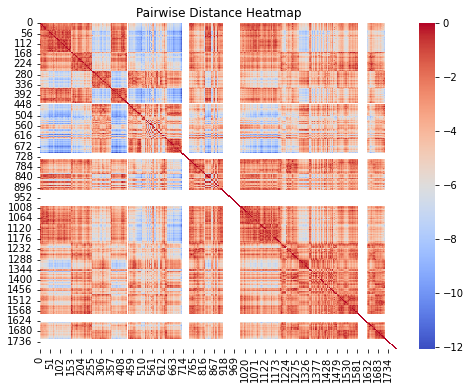

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(-1*distance_matrix, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Distance Heatmap")
plt.show()

In [28]:
cell_1_mean_nans["med_pos"] = ((cell_1_mean_nans["Chrom_Start"] + cell_1_mean_nans["Chrom_End"])/2).astype(int)
n = len(points)
pairs = []
for i in range(len(distance_matrix.index)):
    for j in range(len(distance_matrix.columns)):
      if i < j: # keep the lower triangle
        chr1 = cell_1_mean_nans.loc[i, "Chrom"]
        chr2 = cell_1_mean_nans.loc[j, "Chrom"]
        pos1 = cell_1_mean_nans.loc[i, "med_pos"]
        pos2 = cell_1_mean_nans.loc[j, "med_pos"]
        #cellid = cell_1_mean.loc[i, "Cell_ID"]
        cellid = 0
        pairs.append((cellid, chr1, pos1, chr2, pos2, distance_matrix.iloc[i, j]))

distance_df = pd.DataFrame(pairs, columns=["cell_id", "chrom1", "pos1", "chrom2", "pos2", "Distance"])
# Sort the DataFrame by Distance
# sorted_distance_df = distance_df.sort_values(by="loci1").reset_index(drop=True)
distance_df

cell_id chrom1       pos1 chrom2       pos2  Distance
0              0   chr1    3751343   chr1    6252463       NaN
1              0   chr1    3751343   chr1    8749962       NaN
2              0   chr1    3751343   chr1   11252680  1.393584
3              0   chr1    3751343   chr1    9805415       NaN
4              0   chr1    3751343   chr1   13749905  1.605070
...          ...    ...        ...    ...        ...       ...
1579748        0   chrX  163754620   chrX  168751817       NaN
1579749        0   chrX  163754620   chrY    1252883       NaN
1579750        0   chrX  166253807   chrX  168751817       NaN
1579751        0   chrX  166253807   chrY    1252883       NaN
1579752        0   chrX  168751817   chrY    1252883       NaN

[1579753 rows x 6 columns]

In [29]:
# example_path = os.path.join(hic_ecker_2023_path, '11F_DGV_3C_3-4-B8-F19.3C.contact', '11F_DGV_3C_3-4-B8-F19.3C.contact.tsv.gz')

# contact_df = pd.read_csv(
#                 example_path,
#                 sep="\t",
#                 header=None,
#                 names=["ph1a", "chrom1", "pos1", "ph1b", "ph2a", "chrom2", "pos2", "ph2b"],
#                 compression="gzip",
#                 low_memory=False,
#                 )
# contact_df


# Higashi on DNA-MERFISH

In [31]:
test1_dir = '/n/netscratch/zhuang_lab/Lab/Peter/higashi_dnamerfish/test1'

In [ ]:
def createDistMat(df, codebook_ref_df):
  merged_df_100 = []
  unique_cells = df.Cell_ID.unique()[:100]
  for c in tqdm(range(len(unique_cells)), desc="Processing Cells"):
    cellid = unique_cells[c]
    cell = dna_df.loc[dna_df['Cell_ID'] == cellid]
    cell = cell.rename(columns={cell.columns[0]: 'Spot_ID'})
    fill_cols = {'Cell_ID': cellid, 'X': np.nan, 'Y': np.nan, 'Z': np.nan}
    cell_1_test_nans = add_missing_entries(cell, codebook_ref_df, ['Chrom', 'Chrom_Start', 'Chrom_End', 'Chrom_order'], fill_cols)
    cell_mean = cell_1_test_nans.groupby(["Chrom", "Chrom_Start", "Chrom_End", "Cell_ID", "Chrom_order"]).agg({
        "X": "mean",
        "Y": "mean",
        "Z": "mean",
        # Add other columns to aggregate as needed
    }).reset_index()
    # Initialize an empty list to store distances
    distances = []

    # Convert the relevant columns to a numpy array
    points = cell_mean[["X", "Y", "Z"]].values

    # Compute pairwise distances using scipy's pdist
    pairwise_distances = pdist(points, metric='euclidean')
    distance_matrix = pd.DataFrame(squareform(pairwise_distances))
    cell_mean["med_pos"] = ((cell_mean["Chrom_Start"] + cell_mean["Chrom_End"])/2).astype(int)
    n = len(points)
    pairs = []
    for i in range(len(distance_matrix.index)):
        for j in range(len(distance_matrix.columns)):
          if i < j: # keep the lower triangle
            chr1 = cell_mean.loc[i, "Chrom"]
            chr2 = cell_mean.loc[j, "Chrom"]
            pos1 = cell_mean.loc[i, "med_pos"]
            pos2 = cell_mean.loc[j, "med_pos"]
            #cellid = cell_2_mean.loc[i, "Cell_ID"]
            cell_id = c
            pairs.append((cell_id, chr1, pos1, chr2, pos2, distance_matrix.iloc[i, j]))

    distance_df = pd.DataFrame(pairs, columns=["cell_id", "chrom1", "pos1", "chrom2", "pos2", "distance"])
    # distance_df = pd.DataFrame(pairs, columns=["cell_id", "chrom1", "pos1", "chrom2", "pos2", "count"])
    # distance_df["count"] = (distance_df['count'] - distance_df['count'].min()) / (distance_df['count'].max() - distance_df['count'].min())
    if len(merged_df_100) == 0:
      merged_df_100 = distance_df
    else:
      merged_df_100 = pd.concat([merged_df_100, distance_df], ignore_index=True)
  return merged_df_100

merged_df_100 = createDistMat(dna_df, codebook_ref_df)
merged_df_100.to_csv(os.path.join(test1_dir, 'merfish_dist_test_data.txt'), sep='\t', index=False)
merged_df_100


Processing Cells:  44%|████▍     | 44/100 [38:49<28:02, 30.04s/it]  

In [ ]:
def convert_dist_to_contact_df(dist_df, thresh):
  def threshold_contact(distance):
    if distance <= thresh:
      return 1
    else:
      return 0
  dist_df['count'] = dist_df['distance'].apply(threshold_contact)
  print('dist_df: ', dist_df)
  contact_df = dist_df.drop('distance', axis=1)
  return contact_df

In [ ]:
merged_contact_df_100 = convert_dist_to_contact_df(merged_df_100, 0.75)
merged_contact_df_100

In [ ]:
merged_contact_df_100.to_csv(os.path.join(test1_dir, 'merfish_thresh750nm_test_data.txt'), sep='\t', index=False)

In [21]:
# merged_contact_df_100 = pd.read_csv(os.path.join(test1_dir, 'merfish_thresh750nm_test_data.txt'), sep='\t')



In [22]:
np.sum(merged_contact_df_100['count'])

627729

In [ ]:
!git clone https://github.com/ma-compbio/Higashi/
!cd Higashi
!python setup.py install

Cloning into 'Higashi'...
remote: Enumerating objects: 1406, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 1406 (delta 67), reused 124 (delta 57), pack-reused 1268 (from 1)
Receiving objects: 100% (1406/1406), 190.30 MiB | 27.92 MiB/s, done.
Resolving deltas: 100% (848/848), done.
Updating files: 100% (101/101), done.
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


In [ ]:
# from higashi.Higashi_wrapper import *
import pickle
import json


In [ ]:
label_info = {'cell_id': np.arange(100)
              }

pickle.dump(label_info, open("./merfish_thresh1_test_label_info.pickle", "wb"))

In [ ]:
config = '/content/merfish_thresh1_test_config.JSON'
config_info = {
    "data_dir": "/content",
    "label_path": "/content/merfish_thresh1_test_label_info.pickle",
    "structured": True,
    "input_format": 'higashi_v1',
    "temp_dir": "/content/",
    "genome_reference_path": "/content/chromInfo.txt",
    "cytoband_path": "/content/cytoBand.txt",
    "chrom_list": ['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "resolution": 500000,
    "resolution_cell": 500000,
    "resolution_fh": [500000],
    "embedding_name": "test",
    "minimum_distance": 500000,
    "maximum_distance": -1,
    "local_transfer_range": 0,
    "loss_mode": "zinb",
    "dimensions": 64,
    "impute_list":['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr17', 'chr18', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr9',
       'chr16', 'chr19', 'chr2', 'chr8', "chrX"],
    "neighbor_num": 5,
    "cpu_num": 10,
    "gpu_num": 8,
    "embedding_epoch":5,
    "correct_be_impute": True,
}
import json
with open(config,"w") as f:
    json.dump(config_info, f, indent = 6)

In [ ]:
# Initialize the Higashi instance
higashi_model = Higashi(config)

# Data processing (only needs to be run for once)

higashi_model.generate_chrom_start_end()
higashi_model.extract_table()
higashi_model.create_matrix()

In [ ]:
higashi_model.prep_model()

In [ ]:
higashi_model.train_for_embeddings()

In [ ]:
# Visualize embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print(cell_embeddings.shape)

from umap import UMAP

vec = UMAP(n_components=2, n_neighbors=2, random_state=0).fit_transform(cell_embeddings)
cell_type = higashi_model.label_info['cell type']
batch = higashi_model.label_info['batch']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0, hue_order=['GM12878','IMR90','HFF', 'HAP1', 'H1Esc'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()

In [ ]:
higashi_model.train_for_imputation_nbr_0()
higashi_model.impute_no_nbr()

In [ ]:
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

In [ ]:
count = 0
fig = plt.figure(figsize=(6, 2*5))
for id_ in np.random.randint(0, 620, 5):
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.6))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")

    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")

    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")

plt.tight_layout()